<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-3:-Feature-Extraction-&amp;-EDA" data-toc-modified-id="Part-3:-Feature-Extraction-&amp;-EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 3: Feature Extraction &amp; EDA</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-back-data" data-toc-modified-id="Loading-back-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading back data</a></span></li><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Dictionary</a></span></li><li><span><a href="#Setting-Stopwords" data-toc-modified-id="Setting-Stopwords-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Setting Stopwords</a></span></li><li><span><a href="#Splitting-the-data" data-toc-modified-id="Splitting-the-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Splitting the data</a></span></li><li><span><a href="#Target-Variable" data-toc-modified-id="Target-Variable-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Target Variable</a></span></li><li><span><a href="#Numerical-Features" data-toc-modified-id="Numerical-Features-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Numerical Features</a></span><ul class="toc-item"><li><span><a href="#char_count" data-toc-modified-id="char_count-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>char_count</a></span></li><li><span><a href="#word_count" data-toc-modified-id="word_count-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>word_count</a></span></li><li><span><a href="#Looking-at-Correlations" data-toc-modified-id="Looking-at-Correlations-1.7.3"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>Looking at Correlations</a></span></li></ul></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Categorical Features</a></span><ul class="toc-item"><li><span><a href="#author" data-toc-modified-id="author-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>author</a></span></li></ul></li><li><span><a href="#Textual-Features" data-toc-modified-id="Textual-Features-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Textual Features</a></span><ul class="toc-item"><li><span><a href="#Parts-Of-Speech-(POS)-Tagging" data-toc-modified-id="Parts-Of-Speech-(POS)-Tagging-1.9.1"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>Parts-Of-Speech (POS) Tagging</a></span></li><li><span><a href="#Named-Entity-Recognition-(NER)" data-toc-modified-id="Named-Entity-Recognition-(NER)-1.9.2"><span class="toc-item-num">1.9.2&nbsp;&nbsp;</span>Named Entity Recognition (NER)</a></span></li><li><span><a href="#Ngrams:-Most-Used" data-toc-modified-id="Ngrams:-Most-Used-1.9.3"><span class="toc-item-num">1.9.3&nbsp;&nbsp;</span>Ngrams: Most Used</a></span><ul class="toc-item"><li><span><a href="#Unigrams" data-toc-modified-id="Unigrams-1.9.3.1"><span class="toc-item-num">1.9.3.1&nbsp;&nbsp;</span>Unigrams</a></span></li><li><span><a href="#Bigrams" data-toc-modified-id="Bigrams-1.9.3.2"><span class="toc-item-num">1.9.3.2&nbsp;&nbsp;</span>Bigrams</a></span></li><li><span><a href="#Trigrams" data-toc-modified-id="Trigrams-1.9.3.3"><span class="toc-item-num">1.9.3.3&nbsp;&nbsp;</span>Trigrams</a></span></li><li><span><a href="#Quadgrams" data-toc-modified-id="Quadgrams-1.9.3.4"><span class="toc-item-num">1.9.3.4&nbsp;&nbsp;</span>Quadgrams</a></span></li></ul></li><li><span><a href="#Ngrams:-TF-IDF" data-toc-modified-id="Ngrams:-TF-IDF-1.9.4"><span class="toc-item-num">1.9.4&nbsp;&nbsp;</span>Ngrams: TF-IDF</a></span></li><li><span><a href="#Clean-up" data-toc-modified-id="Clean-up-1.9.5"><span class="toc-item-num">1.9.5&nbsp;&nbsp;</span>Clean up</a></span></li></ul></li></ul></li></ul></div>

# Part 3: Feature Extraction & EDA


## Importing Libraries

In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
import nltk
import spacy
from collections import Counter
from nltk.util import ngrams # function for making ngrams

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Render high resolution images

nlp = spacy.load('en_core_web_sm')

pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100) # adjust number of rows visible 


## Loading back data

In [2]:
# reading data from file
raw = pd.read_csv("data/cleaned_data.csv")
raw.head()

,author,subreddit,text,word_count,date
0,theremnanthodl,Bitcoin,Bitcoin Town - A fiction novel about using Bitcoin against the Great Reset,13,2021-07-22 07:30:06
1,ReadDailyCoin,Bitcoin,"Crypto Influencers Dorsey, Woods, and Musk Face-off During B-Word Conference",10,2021-07-22 07:12:50
2,theloiteringlinguist,Bitcoin,Elon Musk’s View on Bitcoin (July 21 2021),8,2021-07-22 06:58:57
3,Electronic_Chard1987,Bitcoin,"You’ve undoubtedly heard about crypto currencies by now such as Bitcoin, Ethereum and DOGE coin. But you can’t help but wonder what is it? What can I do with it? What is mining? Well CryptoMapz is here to give you answers to all those questions. We are your guide to navigate the crypto ecosystem.",54,2021-07-22 06:49:17
4,FarEnergy3518,Bitcoin,best crypto video ive ever watched,6,2021-07-22 06:49:14


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   author      8188 non-null   object
 1   subreddit   8188 non-null   object
 2   text        8188 non-null   object
 3   word_count  8188 non-null   int64 
 4   date        8188 non-null   object
dtypes: int64(1), object(4)
memory usage: 320.0+ KB


## Data Dictionary

|Feature|Type|Description|
|:---:|:---:|:---|
|author|text| username of author| 
|text|text|the title and selftext of the posts concatenated together| 
|word_count|int|number of words the text consists of| 
|subreddit|text|subreddit the comment belongs to| 
|date|datetime|date of posting| 

In [4]:
# create a working copy so that we have an untouched version to fall back on
df = raw.copy()

## Setting Stopwords

In [5]:
# Setting up the stopword reference

# Stopword reference using spacy
#nlp.Defaults.stop_words.add("nt", "gon", "na", "gonna")   # use this to add ONE stopword
nlp.Defaults.stop_words |= {"nt", "gon", "na", "gonna", 've', 'crypto', 'wallet', 
                            'like', 'new', 'use', 'cryptocurrency', 'price', 'money', 
                            'people', 'way', 'time', 'buy', 'sell','transaction'}   # use this to add multiple stopwords
stopword_spcy = nlp.Defaults.stop_words
print(len(stopword_spcy))
print(sorted(stopword_spcy))

# Stopword reference using nltk
# stopword_nltk = nltk.corpus.stopwords.words('english')
# print(len(stopword_nltk))

345
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'buy', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'crypto', 'cryptocurrency', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'gon', 'gonna', 

In [6]:
#text = "   This is a message to be cleaned. It may involve 1000 things like: <\br>, ?, :, ''  adjacent spaces and tabs  \n   .  "

def clean_symbols(text):
    text = text.lower()                                                  # lowercase
    text = re.compile('<.+>').sub(' ', text)                             # remove html tags | regex: anything that is one or more character between <> --> empty string
    text = re.compile('^https?:\/\/.*[\r\n]*').sub('', text)             # remove url links
    text = re.compile('.https?:\/\/.*[\r\n]*').sub('', text)             # remove url links
    #text = text.translate(str.maketrans('', '', string.punctuation))     # remove punctuation
    #text = re.sub('^\d+\s', ' ', text)                                   # remove digits | regex: anything that is a digit --> one space
    text = re.sub('\s\d+', ' ', text)                                   # remove digits | regex: anything that is a digit --> one space
    text = re.sub(r'[^\w\s]', '', text)                                  # ensure "word-space-word-space" | regex: anything NOT a world followed by a space --> empty string
    text = re.sub('\s+', ' ', text.strip())                              # fix spaces | regex: anything that is one or more spaces --> one space
    text = re.sub('btc', 'bitcoin', text)
    text = re.sub('\seth\s', 'ethereum ', text)
    return text

def preprocess(text):
    delim = ", "
    doc = nlp(text)
    sent_count = len(list(doc.sents)) # using raw text instead to get a more accurate count
    char_count = len(text) 
    
    # intialize the doc object
    doc = nlp(clean_symbols(text))
    
    token_list = [token.text for token in doc if token.is_punct != True and len(token) > 1 and len(token) < 20]
    stopword_list = [token.text for token in doc if not(token.text in stopword_spcy) and token.is_punct != True and len(token) > 1 and len(token) < 20]
    lemma_list = [token.lemma_.lower() for token in doc if not(token.text in stopword_spcy) and token.is_punct != True and len(token) > 1 and len(token) < 20 and token.lemma_.isalpha]
    
    word_count = len(token_list)
    
    # convert to string for easier processing later
    token_str = delim.join(token_list)
    stopword_str = delim.join(stopword_list)
    lemma_str = delim.join(lemma_list)
    
    return token_str, stopword_str, lemma_str, sent_count, word_count, char_count


# Using this function to aid with inspecting the data
def peek(search_term:str, subreddit:str=None): 
    if subreddit == 'btc':
        display(btc_df[btc_df['text_no_stop'].str.contains(search_term)])
    if subreddit == 'eth':
        display(eth_df[eth_df['text_no_stop'].str.contains(search_term)])
    if None:    
        display(df[df['text_no_stop'].str.contains(search_term)])    

In [7]:
# Preprocessing the data (tokenization, stopword removal, lemmatization)
df['text_no_sym'] = df['text'].apply(lambda x: clean_symbols(x))
df['text_tok'], df['text_no_stop'], df['text_lemma'], df['sent_count'],df['word_count'],df['char_count'] = zip(*df['text'].map(preprocess))
display(df.head(10))

,author,subreddit,text,word_count,date,text_no_sym,text_tok,text_no_stop,text_lemma,sent_count,char_count
0,theremnanthodl,Bitcoin,Bitcoin Town - A fiction novel about using Bitcoin against the Great Reset,11,2021-07-22 07:30:06,bitcoin town a fiction novel about using bitcoin against the great reset,"bitcoin, town, fiction, novel, about, using, bitcoin, against, the, great, reset","bitcoin, town, fiction, novel, bitcoin, great, reset","bitcoin, town, fiction, novel, bitcoin, great, reset",1,75
1,ReadDailyCoin,Bitcoin,"Crypto Influencers Dorsey, Woods, and Musk Face-off During B-Word Conference",10,2021-07-22 07:12:50,crypto influencers dorsey woods and musk faceoff during bword conference,"crypto, influencers, dorsey, woods, and, musk, faceoff, during, bword, conference","influencers, dorsey, woods, musk, faceoff, bword, conference","influencer, dorsey, wood, musk, faceoff, bword, conference",1,77
2,theloiteringlinguist,Bitcoin,Elon Musk’s View on Bitcoin (July 21 2021),6,2021-07-22 06:58:57,elon musks view on bitcoin july,"elon, musks, view, on, bitcoin, july","elon, musks, view, bitcoin, july","elon, musk, view, bitcoin, july",1,43
3,Electronic_Chard1987,Bitcoin,"You’ve undoubtedly heard about crypto currencies by now such as Bitcoin, Ethereum and DOGE coin. But you can’t help but wonder what is it? What can I do with it? What is mining? Well CryptoMapz is here to give you answers to all those questions. We are your guide to navigate the crypto ecosystem.",55,2021-07-22 06:49:17,youve undoubtedly heard about crypto currencies by now such as bitcoin ethereum and doge coin but you cant help but wonder what is it what can i do with it what is mining well cryptomapz is here to give you answers to all those questions we are your guide to navigate the crypto ecosystem,"you, ve, undoubtedly, heard, about, crypto, currencies, by, now, such, as, bitcoin, ethereum, and, doge, coin, but, you, ca, nt, help, but, wonder, what, is, it, what, can, do, with, it, what, is, mining, well, cryptomapz, is, here, to, give, you, answers, to, all, those, questions, we, are, your, guide, to, navigate, the, crypto, ecosystem","undoubtedly, heard, currencies, bitcoin, ethereum, doge, coin, help, wonder, mining, cryptomapz, answers, questions, guide, navigate, ecosystem","undoubtedly, hear, currency, bitcoin, ethereum, doge, coin, help, wonder, mine, cryptomapz, answer, question, guide, navigate, ecosystem",6,298
4,FarEnergy3518,Bitcoin,best crypto video ive ever watched,6,2021-07-22 06:49:14,best crypto video ive ever watched,"best, crypto, video, ve, ever, watched","best, video, watched","good, video, watch",1,35
5,hawk-fe,Bitcoin,"what moves crypto market apart from the speculators I would like to know if there is anything that moves crypto market apart from the speculators, or are cryptocurrencies and their prices absolutely speculative?",32,2021-07-22 06:48:53,what moves crypto market apart from the speculators i would like to know if there is anything that moves crypto market apart from the speculators or are cryptocurrencies and their prices absolutely speculative,"what, moves, crypto, market, apart, from, the, speculators, would, like, to, know, if, there, is, anything, that, moves, crypto, market, apart, from, the, speculators, or, are, cryptocurrencies, and, their, prices, absolutely, speculative","moves, market, apart, speculators, know, moves, market, apart, speculators, cryptocurrencies, prices, absolutely, speculative","move, market, apart, speculator, know, move, market, apart, speculator, cryptocurrencie, price, absolutely, speculative",2,216
6,jamesonisraela,Bitcoin,This is the newest project of him?,7,2021-07-22 06:43:35,this is the newest project of him,"this, is, the, newest, project, of, him","newest, project","new, project",1,35
7,Idontknow881,Bitcoin,Is it advisable to use P2P when buying bitcoin ?,9,2021-07-22 06:42:28,is it advisable to use p2p when buying bitcoin,"is, it, advisable, to, use, p2p, when, buying, bitcoin","advis

In [8]:
# check dataframe after change
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        8188 non-null   object
 1   subreddit     8188 non-null   object
 2   text          8188 non-null   object
 3   word_count    8188 non-null   int32 
 4   date          8188 non-null   object
 5   text_no_sym   8188 non-null   object
 6   text_tok      8188 non-null   object
 7   text_no_stop  8188 non-null   object
 8   text_lemma    8188 non-null   object
 9   sent_count    8188 non-null   int32 
 10  char_count    8188 non-null   int32 
dtypes: int32(3), object(8)
memory usage: 607.8+ KB


None

In [9]:
# Checking for zero char_count rows to avoid zero division error
print(df[df['char_count']== 0].shape)

# check for rows with no lemma. Model fitting requires no nulls to work properly
print(df[df['text_lemma']==''].shape)

(0, 11)
(21, 11)


In [10]:
# check why there's no lemma
df[df['text_lemma']==''].head(25)

,author,subreddit,text,word_count,date,text_no_sym,text_tok,text_no_stop,text_lemma,sent_count,char_count
25,Money_Mo2248,Bitcoin,Use this to make money!!!,5,2021-07-22 04:14:05,use this to make money,"use, this, to, make, money",,,1,26
475,Nackskottsromantiker,Bitcoin,What would you do?!,4,2021-07-20 21:04:37,what would you do,"what, would, you, do",,,1,20
564,Rorycoconnor,Bitcoin,We’ve been here before..,5,2021-07-20 15:45:47,weve been here before,"we, ve, been, here, before",,,1,25
944,eldor1274,Bitcoin,"You buy we sell, you sell we buy.",8,2021-07-19 06:52:45,you buy we sell you sell we buy,"you, buy, we, sell, you, sell, we, buy",,,1,34
1149,Mary3325744,Bitcoin,http://zoniryroyal.com This is the best crypto investments platform that helps you grow and multiply your bitcoin. Fast paying and reliable 🏅 NO DELAY IN CASHING OUT 🥇 GREAT BONUS 🥈 SUPERB REFERRAL BONUS 🥉 I’ve SEEN!💯 I’ve INVESTED!💯 I’ve been PAID severely What’sapp +79269728362,0,2021-07-18 10:32:26,,,,,5,281
1549,Aggravating-Fox-8068,Bitcoin,Buy while you can!,4,2021-07-16 15:07:57,buy while you can,"buy, while, you, can",,,1,19
2967,primergig,Bitcoin,sometimes you have to,4,2021-07-11 15:16:32,sometimes you have to,"sometimes, you, have, to",,,2,22
3044,djxarrow,Bitcoin,When you see it...,4,2021-07-11 06:34:35,when you see it,"when, you, see, it",,,1,19
3232,Creepy-Purchase-5630,Bitcoin,https://fortune.com/2021/07/10/bitcoin-why-you-should-be-terrified-of-owning-btc/amp/ The absolute BS FUD coming out of Shawn Tully’s uninformed journalistic face is insane. Read what an absolute utter lack of knowledge looks like and it’s Shawn Tully of Fortune. I would like to create a new segment here at r/bitcoin and it’s title will be ‘Worthless FUD Piece of the Week. Shawn Tully of Fortune you win the prize this week!,0,2021-07-10 10:00:28,,,,,5,427
3301,ameliathomas_1,Bitcoin,You can get this!,4,2021-07-10 00:11:33,you can get this,"you, can, get, this",,,1,18


In [11]:
# one hot encoding for target variable. Easier to analyze with number vs text
df = pd.get_dummies(df, columns=['subreddit'],  prefix='is', drop_first=True)
df.head()

,author,text,word_count,date,text_no_sym,text_tok,text_no_stop,text_lemma,sent_count,char_count,is_ethereum
0,theremnanthodl,Bitcoin Town - A fiction novel about using Bitcoin against the Great Reset,11,2021-07-22 07:30:06,bitcoin town a fiction novel about using bitcoin against the great reset,"bitcoin, town, fiction, novel, about, using, bitcoin, against, the, great, reset","bitcoin, town, fiction, novel, bitcoin, great, reset","bitcoin, town, fiction, novel, bitcoin, great, reset",1,75,0
1,ReadDailyCoin,"Crypto Influencers Dorsey, Woods, and Musk Face-off During B-Word Conference",10,2021-07-22 07:12:50,crypto influencers dorsey woods and musk faceoff during bword conference,"crypto, influencers, dorsey, woods, and, musk, faceoff, during, bword, conference","influencers, dorsey, woods, musk, faceoff, bword, conference","influencer, dorsey, wood, musk, faceoff, bword, conference",1,77,0
2,theloiteringlinguist,Elon Musk’s View on Bitcoin (July 21 2021),6,2021-07-22 06:58:57,elon musks view on bitcoin july,"elon, musks, view, on, bitcoin, july","elon, musks, view, bitcoin, july","elon, musk, view, bitcoin, july",1,43,0
3,Electronic_Chard1987,"You’ve undoubtedly heard about crypto currencies by now such as Bitcoin, Ethereum and DOGE coin. But you can’t help but wonder what is it? What can I do with it? What is mining? Well CryptoMapz is here to give you answers to all those questions. We are your guide to navigate the crypto ecosystem.",55,2021-07-22 06:49:17,youve undoubtedly heard about crypto currencies by now such as bitcoin ethereum and doge coin but you cant help but wonder what is it what can i do with it what is mining well cryptomapz is here to give you answers to all those questions we are your guide to navigate the crypto ecosystem,"you, ve, undoubtedly, heard, about, crypto, currencies, by, now, such, as, bitcoin, ethereum, and, doge, coin, but, you, ca, nt, help, but, wonder, what, is, it, what, can, do, with, it, what, is, mining, well, cryptomapz, is, here, to, give, you, answers, to, all, those, questions, we, are, your, guide, to, navigate, the, crypto, ecosystem","undoubtedly, heard, currencies, bitcoin, ethereum, doge, coin, help, wonder, mining, cryptomapz, answers, questions, guide, navigate, ecosystem","undoubtedly, hear, currency, bitcoin, ethereum, doge, coin, help, wonder, mine, cryptomapz, answer, question, guide, navigate, ecosystem",6,298,0
4,FarEnergy3518,best crypto video ive ever watched,6,2021-07-22 06:49:14,best crypto video ive ever watched,"best, crypto, video, ve, ever, watched","best, video, watched","good, video, watch",1,35,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        8188 non-null   object
 1   text          8188 non-null   object
 2   word_count    8188 non-null   int32 
 3   date          8188 non-null   object
 4   text_no_sym   8188 non-null   object
 5   text_tok      8188 non-null   object
 6   text_no_stop  8188 non-null   object
 7   text_lemma    8188 non-null   object
 8   sent_count    8188 non-null   int32 
 9   char_count    8188 non-null   int32 
 10  is_ethereum   8188 non-null   uint8 
dtypes: int32(3), object(7), uint8(1)
memory usage: 551.9+ KB


## Splitting the data

In [13]:
# Splitting into numerical, categorical & target variables
target = ['is_ethereum']
num_col = list(set(df.select_dtypes(include =np.number).columns.to_list()) - set(target))
cat_col = df.select_dtypes(exclude =np.number).columns.to_list()

print("Target Column: {}".format(target))
print("Numerical Columns: {}".format(num_col))
print("Categorical Columns: {}".format(cat_col))

Target Column: ['is_ethereum']
Numerical Columns: ['sent_count', 'char_count', 'word_count']
Categorical Columns: ['author', 'text', 'date', 'text_no_sym', 'text_tok', 'text_no_stop', 'text_lemma']


## Target Variable


Target class looks relatively balanced.


Feature: subreddit


,counts,Percent
is_ethereum,,
0,4284,52.3%
1,3904,47.7%


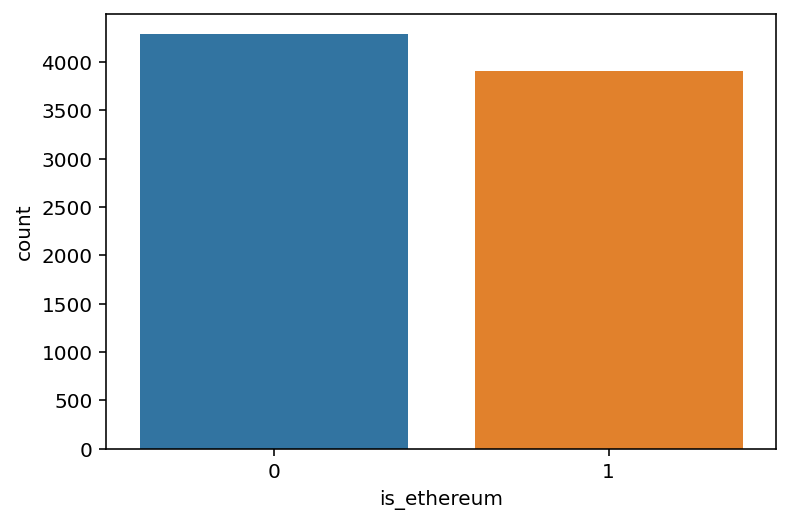

In [14]:
# create target dataframe
target_df = df[target]
_ = sns.countplot(x=target[0], data=target_df)

# inspect value counts
counts = target_df.value_counts()
pct = target_df.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print("\nFeature: {}".format('subreddit'))
display(pd.DataFrame({'counts': counts, 'Percent': pct}))

## Numerical Features


,count,mean,std,min,25%,50%,75%,max
sent_count,8188.0,2.969468,5.846416,1.0,1.0,1.0,3.0,166.0
char_count,8188.0,203.108329,524.813935,13.0,46.0,72.0,157.0,20959.0
word_count,8188.0,27.236444,59.484991,0.0,7.0,11.0,23.0,1971.0


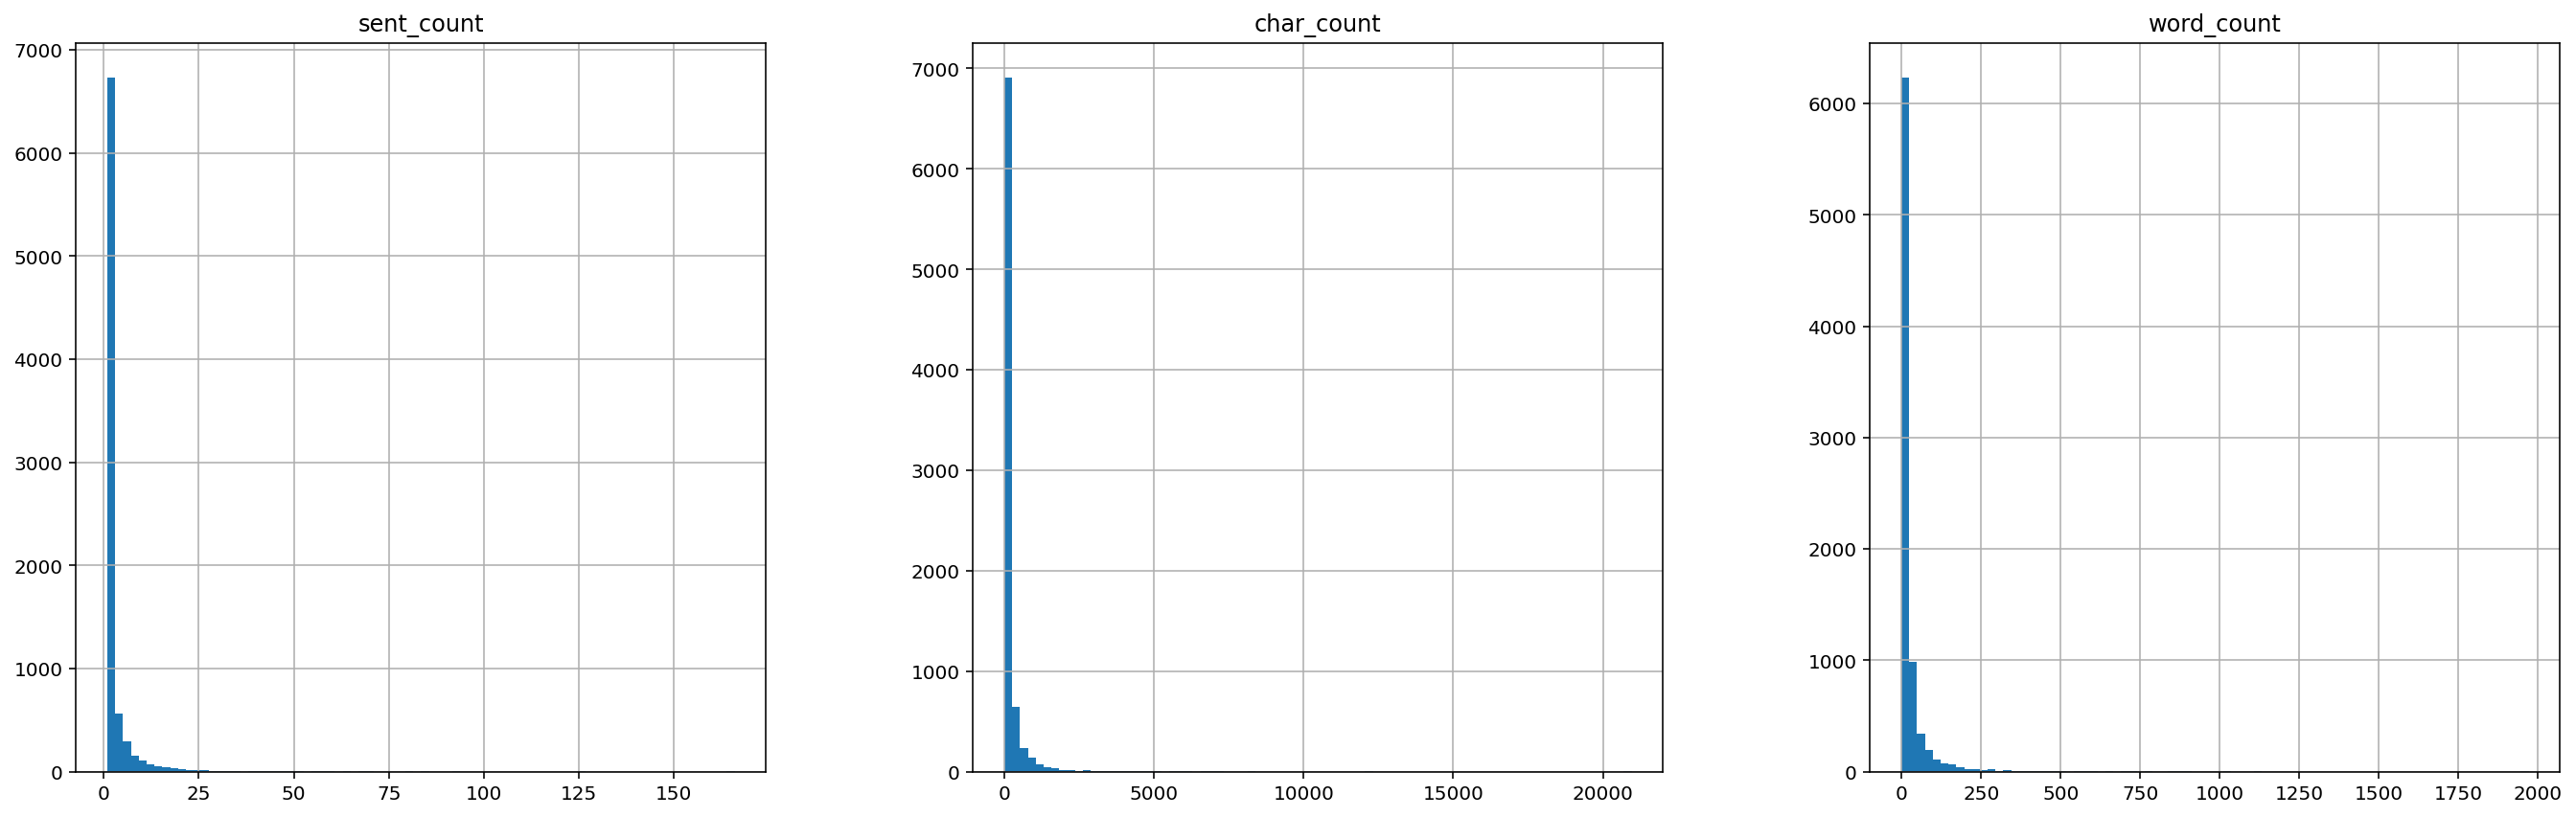

In [15]:
num_df = df[num_col]
display(num_df.describe().T)
_ = num_df.hist(bins=80, figsize=(40, 7), layout=(1, 5))

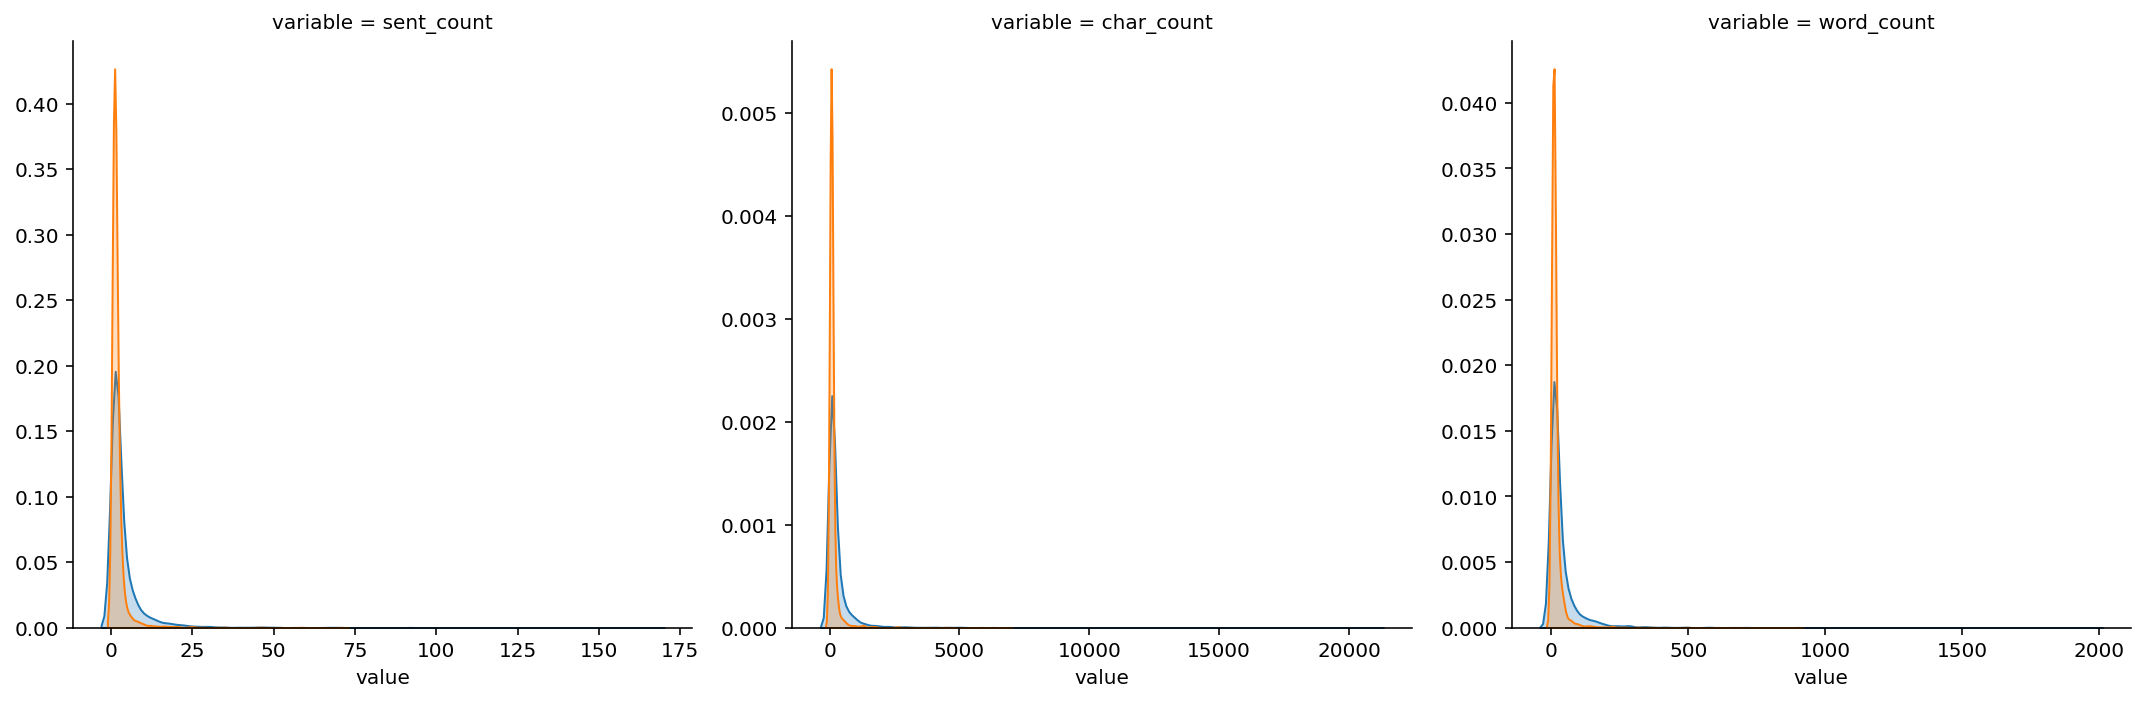

In [16]:
#print(pd.melt(id_vars = 'is_ethereum, '))
g = sns.FacetGrid(df[num_col + target].melt(target[0]), col='variable', hue=target[0], height=5, sharey = False, sharex=False)
g = g.map(sns.kdeplot, "value", shade=True)
#g.axes[0].legend()

### char_count
* Looking at the commments, the longer comments seems to add more meaningful context and should help with the training --> Not removing

In [17]:
print(df[df['char_count'] > 158].shape)
df[df['char_count'] > 158].sort_values('char_count', ascending=False).head()

(2033, 11)


,author,text,word_count,date,text_no_sym,text_tok,text_no_stop,text_lemma,sent_count,char_count,is_ethereum
1458,billy-gage,"New investment opportunity in bitcoins Currently, the use of Bitcoin has spread worldwide, and it can be said that in every country in the world there are people mining this famous cryptocurrency. However, there are countries where Bitcoin is more widely used, so much so that there are companies, businesses and even ATMs to carry out transactions with this cryptocurrency. Being a currency not issued or controlled by central banks and the international banking system in general, they have...",1971,2021-07-16 23:24:44,new investment opportunity in bitcoins currently the use of bitcoin has spread worldwide and it can be said that in every country in the world there are people mining this famous cryptocurrency however there are countries where bitcoin is more widely used so much so that there are companies businesses and even atms to carry out transactions with this cryptocurrency being a currency not issued or controlled by central banks and the international banking system in general they have been develo...,"new, investment, opportunity, in, bitcoins, currently, the, use, of, bitcoin, has, spread, worldwide, and, it, can, be, said, that, in, every, country, in, the, world, there, are, people, mining, this, famous, cryptocurrency, however, there, are, countries, where, bitcoin, is, more, widely, used, so, much, so, that, there, are, companies, businesses, and, even, atms, to, carry, out, transactions, with, this, cryptocurrency, being, currency, not, issued, or, controlled, by, central, banks, an...","investment, opportunity, bitcoins, currently, bitcoin, spread, worldwide, said, country, world, mining, famous, countries, bitcoin, widely, companies, businesses, atms, carry, transactions, currency, issued, controlled, central, banks, international, banking, system, general, developing, campaign, possible, means, aim, discrediting, cryptocurrencies, releases, control, banks, governments, operations, carried, block, chain, monitored, controlled, specific, person, organization, completely, de...","investment, opportunity, bitcoin, currently, bitcoin, spread, worldwide, say, country, world, mine, famous, country, bitcoin, widely, company, business, atms, carry, transaction, currency, issue, control, central, bank, international, banking, system, general, develop, campaign, possible, mean, aim, discrediting, cryptocurrencie, release, control, bank, government, operation, carry, block, chain, monitor, control, specific, person, organization, completely, decentralize, system, government, ...",126,20959,0
1354,eminogrande,"Episode #1: What is Bitcoin? After being in Bitcoin since 2013, I decided to start a YouTube channel in English to educate people. Feedback Is welcome, please watch: [https://www.youtube.com/watch?v=IfyZReFeDNQ](https://www.youtube.com/watch?v=IfyZReFeDNQ) Here is the transcript: What is Bitcoin? In this video I will explain Bitcoin, from a non technical perspective. I will use easy language and examples that help you to understand everything better. Bitcoin was introduced during the f...",24,2021-07-17 13:31:13,episode 1 what is bitcoin after being in bitcoin since i decided to start a youtube channel in english to educate people feedback is welcome please watch,"episode, what, is, bitcoin, after, being, in, bitcoin, since, decided, to, start, youtube, channel, in, english, to, educate, people, feedback, is, welcome, please, watch","episode, bitcoin, bitcoin, decided, start, youtube, channel, english, educate, feedback, welcome, watch","episode, bitcoin, bitcoin, decide, start, youtube, channel, english, educate, feedback, welcome, watch",166,12229,0
2480,annherring,"AGRA WOOD POLSKA SCAM, FREELANCE GRAPHIC DESIGNER IDENTITY THEFT AND FRAUD, Bitcoin, TOMASZ NOWACZYK, TOBY LAURIE,posbit.io, Upwork, Telegram Hi all! My goal is to ruin scammers fraud activities that affecting us Freelancers and mak

In [18]:
# inspecting the opposite end of char_count
# Seems to have a lot of generic content
print(df[df['char_count'] < 141].shape)
df[(df['char_count'] < 46) & (df['char_count'] > 13)].sort_values('char_count').head(20)

(5961, 11)


,author,text,word_count,date,text_no_sym,text_tok,text_no_stop,text_lemma,sent_count,char_count,is_ethereum
5410,Lurk-Prowl,All in or DCA,4,2021-07-08 18:01:13,all in or dca,"all, in, or, dca",dca,dca,1,14,1
4416,LiveStart6512,To the MOON 🌙,3,2021-07-20 18:15:03,to the moon,"to, the, moon",moon,moon,1,14,1
7989,Xx2hotReallyxX,Idiot in a bus,3,2021-06-13 12:29:17,idiot in a bus,"idiot, in, bus","idiot, bus","idiot, bus",1,15,1
8070,According_Western914,Who buys AMP ?,3,2021-06-12 14:36:47,who buys amp,"who, buys, amp","buys, amp","buy, amp",1,15,1
2543,cryptoWithSana,What is IOTA ?,3,2021-07-13 08:31:20,what is iota,"what, is, iota",iota,iota,1,15,0
1407,Liam-lji2000,Worth a look 👀,2,2021-07-17 06:51:06,worth a look,"worth, look","worth, look","worth, look",1,15,0
5890,Possible_Pickle_1,Do you dare? ;),3,2021-07-04 11:20:23,do you dare,"do, you, dare",dare,dare,2,16,1
6527,sky_Driver88,ETH 2 point Oh.,3,2021-06-27 14:02:26,eth point oh,"eth, point, oh","eth, point, oh","eth, point, oh",2,16,1
5228,Rotakeshan,Why the 3% jump,3,2021-07-10 21:59:21,why the jump,"why, the, jump",jump,jump,1,16,1
4241,Mr_chaudhary04,My doge to moon,4,2021-07-06 15:38:56,my doge to moon,"my, doge, to, moon","doge, moon","doge, moon",1,16,0


### word_count

In [19]:
print(df[df['word_count'] ==10].shape)
df[(df['word_count']== 10)].head(20)

(509, 11)


,author,text,word_count,date,text_no_sym,text_tok,text_no_stop,text_lemma,sent_count,char_count,is_ethereum
1,ReadDailyCoin,"Crypto Influencers Dorsey, Woods, and Musk Face-off During B-Word Conference",10,2021-07-22 07:12:50,crypto influencers dorsey woods and musk faceoff during bword conference,"crypto, influencers, dorsey, woods, and, musk, faceoff, during, bword, conference","influencers, dorsey, woods, musk, faceoff, bword, conference","influencer, dorsey, wood, musk, faceoff, bword, conference",1,77,0
28,JDavisxu,Looking for developer to partner on crypto focused start up.,10,2021-07-22 04:00:22,looking for developer to partner on crypto focused start up,"looking, for, developer, to, partner, on, crypto, focused, start, up","looking, developer, partner, focused, start","look, developer, partner, focus, start",1,61,0
124,clearblock_,This Current Bitcoin Cycle Could Look a lot Like 2013 — Clearblock Insights,10,2021-07-21 20:55:05,this current bitcoin cycle could look a lot like clearblock insights,"this, current, bitcoin, cycle, could, look, lot, like, clearblock, insights","current, bitcoin, cycle, look, lot, clearblock, insights","current, bitcoin, cycle, look, lot, clearblock, insight",2,76,0
132,CultureHot2369,Now What? BTC Going to Moon or Going to Doom?,10,2021-07-21 20:29:39,now what bitcoin going to moon or going to doom,"now, what, bitcoin, going, to, moon, or, going, to, doom","bitcoin, going, moon, going, doom","bitcoin, go, moon, go, doom",2,46,0
141,Sir_Baldington,test post to see if i can post yeah just a test,10,2021-07-21 20:02:31,test post to see if i can post yeah just a test,"test, post, to, see, if, can, post, yeah, just, test","test, post, post, yeah, test","test, post, post, yeah, test",3,47,0
147,Bitcoin_Magazine,"Elon Musk Discusses Merits Of Bitcoin, Reveals SpaceX Holds BTC",10,2021-07-21 19:45:59,elon musk discusses merits of bitcoin reveals spacex holds bitcoin,"elon, musk, discusses, merits, of, bitcoin, reveals, spacex, holds, bitcoin","elon, musk, discusses, merits, bitcoin, reveals, spacex, holds, bitcoin","elon, musk, discuss, merit, bitcoin, reveal, spacex, hold, bitcoin",1,64,0
151,s3k2p7s9m8b5,Elon Musk says SpaceX owns Bitcoin in Jack Dorsey talk,10,2021-07-21 19:25:12,elon musk says spacex owns bitcoin in jack dorsey talk,"elon, musk, says, spacex, owns, bitcoin, in, jack, dorsey, talk","elon, musk, says, spacex, owns, bitcoin, jack, dorsey, talk","elon, musk, say, spacex, own, bitcoin, jack, dorsey, talk",2,55,0
152,TheLuckyLeandro,Elon Musk says Tesla will likely start accepting bitcoin again.,10,2021-07-21 19:22:42,elon musk says tesla will likely start accepting bitcoin again,"elon, musk, says, tesla, will, likely, start, accepting, bitcoin, again","elon, musk, says, tesla, likely, start, accepting, bitcoin","elon, musk, say, tesla, likely, start, accept, bitcoin",1,64,0
162,Mysterious-Kitchen51,Q and A How much DEFIT token do I need to get 1 Bitcoin? 🤔🤔🤔 https://preview.redd.it/rq3c3yhk5mc71.jpg?width=1500&format=pjpg&auto=webp&s=25754a39df32dd0b37524923d3990f14a5920511,10,2021-07-21 19:00:01,q and a how much defit token do i need to get bitcoin,"and, how, much, defit, token, do, need, to, get, bitcoin","defit, token, need, bitcoin","defit, token, need, bitcoin",4,181,0
214,FunRajeshsah,Bitcoin’s Taproot Update — What Does It Mean For The Markets?,10,2021-07-21 16:22:15,bitcoins taproot update what does it mean for the markets,"bitcoins, taproot, update, what, does, it, mean, for, the, markets","bitcoins, taproot, update, mean, markets","bitcoin, taproot, update, mean, market",1,62,0


### Looking at Correlations
* all numerical features seems to have no correlation with the target variable, which is not surprisingly


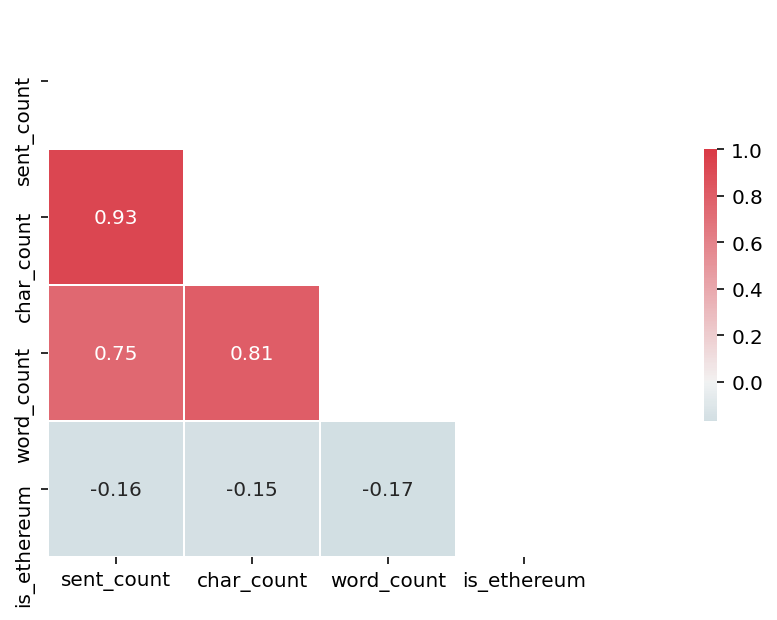

In [20]:
# Plotting heatmap
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize=(20, 5))

#Get correlation figures
corr = df[num_col + target ].corr()

# masking to remove duplicated half
mask = np.triu(np.ones_like(corr, dtype=bool))

# select color palette
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# plot heatmap
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',square=True, linewidths=.5, cbar_kws={"shrink": .5})


## Categorical Features

In [21]:
# setting up dataframe for categorical features
cat_df = df[['author', 'date', 'text']]
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   author  8188 non-null   object
 1   date    8188 non-null   object
 2   text    8188 non-null   object
dtypes: object(3)
memory usage: 192.0+ KB


In [22]:
def plot_cat(col_name):
    plot_df = pd.DataFrame.from_dict(Counter(cat_df[col_name].values.tolist()).most_common(20)).rename(columns={0:col_name, 1: 'freq_count'})
    display(plot_df.head(10))
    plot_df.plot(kind='barh',y='freq_count', x=col_name, figsize=(15,9))


def peek_text_cat(col_name, search_term):    
    display(df[df[col_name] == search_term][[col_name, 'is_ethereum','text']].head(10))

### author

,author,freq_count
0,twigwam,134
1,[deleted],90
2,simplelifestyle,47
3,Zalkifl_Savage,42
4,Needle_NFT,41
5,rollingincrypto,38
6,adminalex360,36
7,nicky_papagiorgio,33
8,TobiHovey,30
9,PeacockMamba,30


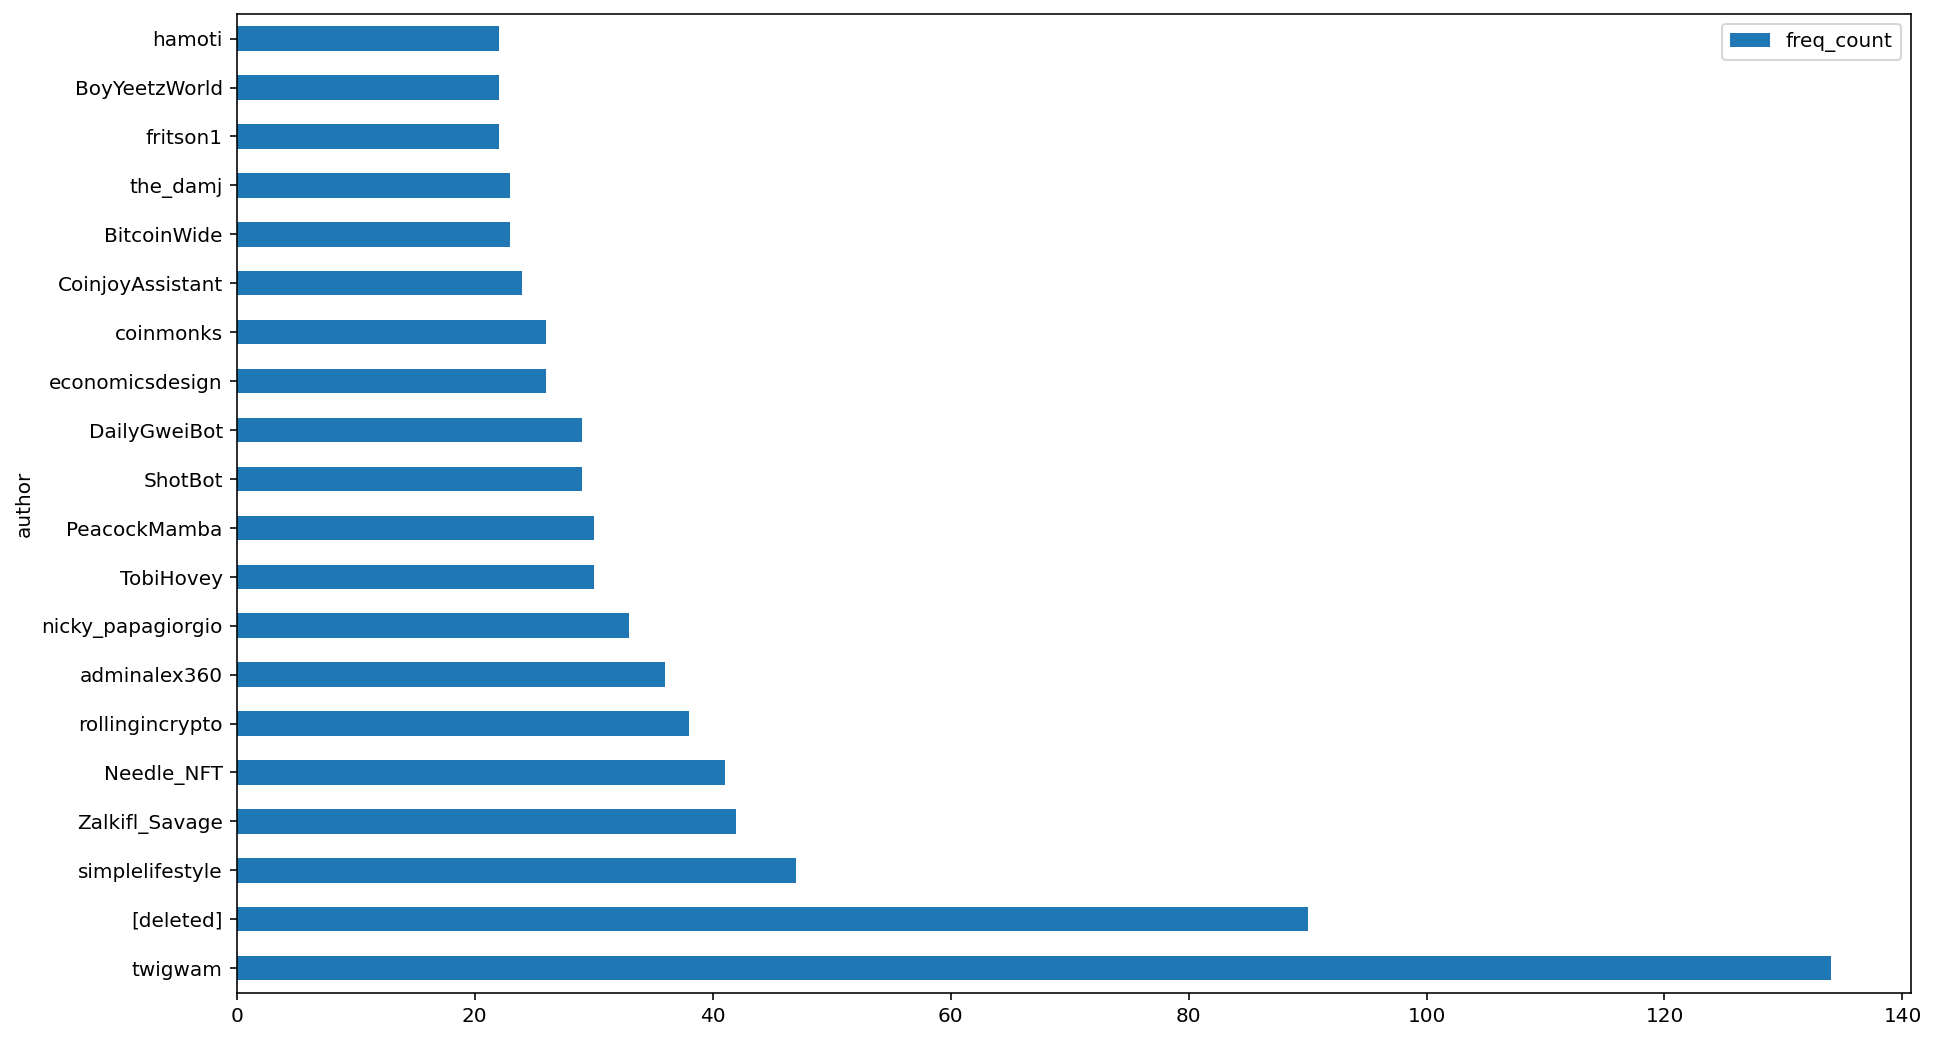

In [23]:
# coinfeeds-bot is a bot that posts news. Decided to include it to help out with the context
plot_cat('author')

* Love the contrast between bitcoin and ethereum
    * Bitcoin: posts seems to suggest bitcoin as an asset or mode of payment
    *Ethereum: posts seems to related more towards the technology behind cryptocurrency

In [24]:
peek_text_cat('author', 'twigwam')

,author,is_ethereum,text
4301,twigwam,1,Ashton Kutcher & Mila Kunis on Crypto -- WAIT FOR IT!
4334,twigwam,1,The Evolution of Ethereum -- Nasdaq
4337,twigwam,1,Ethereum.org Q3 '21 product roadmap
4343,twigwam,1,"A new Bank of Canada report, ""The Positive Case for a CBDC"", sites Ethereum as the standard from smart contracts and programmable money"
4346,twigwam,1,"""The Biggest, Clearest Bet of All is Ethereum"", former Goldman-Sachs hedge fund manager Raoul Pal says in his sit-down with Camila Russo on The Defiant"
4407,twigwam,1,"Only 100,000 Blocks left until London activates on Ethereum Mainnet ⏱"
4422,twigwam,1,MakerDAO Moves to Full Decentralization; Maker Foundation to Close in 'Months'
4432,twigwam,1,Retroactive Public Goods Funding -- Ethereum Optimism
4440,twigwam,1,Ethereum’s London Upgrade -- Bitcoin Suisse Research
4442,twigwam,1,All EthCC 2021 Conference Streams Are Here! [July 20-22]


In [25]:
peek_text_cat('author', 'simplelifestyle')

,author,is_ethereum,text
35,simplelifestyle,0,Elon's t-shirt today inspired me to buy one
154,simplelifestyle,0,"Elon Musk Still A Bitcoin ‘Supporter’: ‘I Own Bitcoin, Tesla Owns Bitcoin, SpaceX Owns Bitcoin’"
200,simplelifestyle,0,Bitcoin Spreading Like Wildfire (Layer 2)
294,simplelifestyle,0,"BNY Mellon Joins 6 Major Banks in Backing New Bitcoin Exchange. Pure Digital says the first trade will take place on its platform “within a week,"" and that it will be a bitcoin trade."
377,simplelifestyle,0,"I know we shouldn't talk about EM here, but... I think it's interesting to consider how both the insiders and the market in general will react to the speculated announcement he 'allegedly' will make tomorrow about accepting Bitcoin back again as payment and backtracking of the energy FUD, now ""approving"" it after ""new data"" from the miners indicating Bitcoin incentivizes green energy and it's good for the environment (which has always been true). I know, it's all a charade, but nonetheless ..."
540,simplelifestyle,0,"Mastercard Creates Simplified Payments Card Offering for Cryptocurrency Companies. Mastercard announced today it will enhance its card program for cryptocurrency wallets and exchanges, making it simpler for partners to convert cryptocurrency to traditional fiat currency."
582,simplelifestyle,0,"Most Clients See Bitcoin as an Asset Class and want to invest in it, Says J.P. Morgan's Erdoes"
589,simplelifestyle,0,"In a newly released video, JP Morgan's head of wealth management says clients are increasingly viewing Bitcoin as an asset class and they want to invest in it."
734,simplelifestyle,0,"Bitcoin: Elon Musk, Jack Dorsey & Cathie Wood Talk Bitcoin at The B Word Conference (Scheduled for this Wednesday, Jul 21, 2021)"
1066,simplelifestyle,0,How to never sell your Bitcoin | A long term HODLer Guide (By Dan Hedl)


In [26]:
# Checking the proportion of authors who posts in both subreddits
# it seems the two groups are very different from one another with only about 1% hopping between the two subreddit
test_df = df[['author', 'is_ethereum']].drop_duplicates()
test_df = test_df.groupby('author')['is_ethereum'].count().to_frame('count')
print(test_df.head())
print('\n', '-'* 100, '\n')
print('Number of authors: {}'.format(test_df.shape[0]))
print('Number of authors who posts in both subreddits: {} ({}%)'.format(test_df[test_df['count'] == 2].shape[0], test_df[test_df['count'] == 2].shape[0] / test_df.shape[0] * 100)) 



                  count
author                 
-Beckham_Jordyn-      1
-Bott1                1
-Chaotix-             1
-Corey_Dakota-        1
-LibertyCrypto-       1

 ---------------------------------------------------------------------------------------------------- 

Number of authors: 4946
Number of authors who posts in both subreddits: 197 (3.983016579053781%)


Most people that post tend to stick to one or the either subreddit. \
Only 4% posts in both subreddits

## Textual Features

In [27]:
# Splitting into btc and eth datasets
btc_df = df[df['is_ethereum'] == 0]
eth_df = df[df['is_ethereum'] == 1]
display(btc_df.head())
display(eth_df.head())

,author,text,word_count,date,text_no_sym,text_tok,text_no_stop,text_lemma,sent_count,char_count,is_ethereum
0,theremnanthodl,Bitcoin Town - A fiction novel about using Bitcoin against the Great Reset,11,2021-07-22 07:30:06,bitcoin town a fiction novel about using bitcoin against the great reset,"bitcoin, town, fiction, novel, about, using, bitcoin, against, the, great, reset","bitcoin, town, fiction, novel, bitcoin, great, reset","bitcoin, town, fiction, novel, bitcoin, great, reset",1,75,0
1,ReadDailyCoin,"Crypto Influencers Dorsey, Woods, and Musk Face-off During B-Word Conference",10,2021-07-22 07:12:50,crypto influencers dorsey woods and musk faceoff during bword conference,"crypto, influencers, dorsey, woods, and, musk, faceoff, during, bword, conference","influencers, dorsey, woods, musk, faceoff, bword, conference","influencer, dorsey, wood, musk, faceoff, bword, conference",1,77,0
2,theloiteringlinguist,Elon Musk’s View on Bitcoin (July 21 2021),6,2021-07-22 06:58:57,elon musks view on bitcoin july,"elon, musks, view, on, bitcoin, july","elon, musks, view, bitcoin, july","elon, musk, view, bitcoin, july",1,43,0
3,Electronic_Chard1987,"You’ve undoubtedly heard about crypto currencies by now such as Bitcoin, Ethereum and DOGE coin. But you can’t help but wonder what is it? What can I do with it? What is mining? Well CryptoMapz is here to give you answers to all those questions. We are your guide to navigate the crypto ecosystem.",55,2021-07-22 06:49:17,youve undoubtedly heard about crypto currencies by now such as bitcoin ethereum and doge coin but you cant help but wonder what is it what can i do with it what is mining well cryptomapz is here to give you answers to all those questions we are your guide to navigate the crypto ecosystem,"you, ve, undoubtedly, heard, about, crypto, currencies, by, now, such, as, bitcoin, ethereum, and, doge, coin, but, you, ca, nt, help, but, wonder, what, is, it, what, can, do, with, it, what, is, mining, well, cryptomapz, is, here, to, give, you, answers, to, all, those, questions, we, are, your, guide, to, navigate, the, crypto, ecosystem","undoubtedly, heard, currencies, bitcoin, ethereum, doge, coin, help, wonder, mining, cryptomapz, answers, questions, guide, navigate, ecosystem","undoubtedly, hear, currency, bitcoin, ethereum, doge, coin, help, wonder, mine, cryptomapz, answer, question, guide, navigate, ecosystem",6,298,0
4,FarEnergy3518,best crypto video ive ever watched,6,2021-07-22 06:49:14,best crypto video ive ever watched,"best, crypto, video, ve, ever, watched","best, video, watched","good, video, watch",1,35,0


,author,text,word_count,date,text_no_sym,text_tok,text_no_stop,text_lemma,sent_count,char_count,is_ethereum
4284,wuzzgucci,"Should I sell bitcoin and just go all in ethereum? * I have like $37.5k invested total in bitcoin, and after the crash, I only have $10.8k gains. If I sold at $65k, I'd have $100k right now in cash. * I basically bought a whole coin at around $10k, held since, gained a lot, bought more to have .5 more buying on the way up from $35-60k. My new stack got cut in half. So basically it equalized and what would have been $100k if we kept going up is now around $50k. * I'm down a lot right now from...",309,2021-07-22 07:25:27,should i sell bitcoin and just go all in ethereum i have like 375k invested total in bitcoin and after the crash i only have 108k gains if i sold at 65k id have 100k right now in cash i basically bought a whole coin at around 10k held since gained a lot bought more to have 5 more buying on the way up from 3560k my new stack got cut in half so basically it equalized and what would have been 100k if we kept going up is now around 50k im down a lot right now from my new stack should i just hodl...,"should, sell, bitcoin, and, just, go, all, in, ethereum, have, like, 375k, invested, total, in, bitcoin, and, after, the, crash, only, have, 108k, gains, if, sold, at, 65k, have, 100k, right, now, in, cash, basically, bought, whole, coin, at, around, 10k, held, since, gained, lot, bought, more, to, have, more, buying, on, the, way, up, from, 3560k, my, new, stack, got, cut, in, half, so, basically, it, equalized, and, what, would, have, been, 100k, if, we, kept, going, up, is, now, around, 5...","bitcoin, ethereum, 375k, invested, total, bitcoin, crash, 108k, gains, sold, 65k, 100k, right, cash, basically, bought, coin, 10k, held, gained, lot, bought, buying, 3560k, stack, got, cut, half, basically, equalized, 100k, kept, going, 50k, lot, right, stack, hodl, expecting, dip, 27k, bitcoin, bitcoin, surprise, break, resistance, line, past, 328k, 30k, support, february, sold, bitcoin, 48558, bought, 27k, bitcoin, bought, 25, coins, idk, dooo, wanna, hold, negative, scared, wanna, wake, f...","bitcoin, ethereum, 375k, invest, total, bitcoin, crash, 108k, gain, sell, 65k, 100k, right, cash, basically, buy, coin, 10k, hold, gain, lot, buy, buying, 3560k, stack, got, cut, half, basically, equalize, 100k, keep, go, 50k, lot, right, stack, hodl, expect, dip, 27k, bitcoin, bitcoin, surprise, break, resistance, line, past, 328k, 30k, support, february, sell, bitcoin, 48558, buy, 27k, bitcoin, buy, 25, coin, idk, dooo, wanna, hold, negative, scared, wanna, wake, find, bitcoin, go, end, bi...",24,1707,1
4285,Needle_NFT,The hug – ultra rare 1/1,4,2021-07-22 07:18:39,the hug ultra rare 1,"the, hug, ultra, rare","hug, ultra, rare","hug, ultra, rare",1,25,1
4286,FarEnergy3518,The Internet World of our Future!!! (INSANE) the best vid I’ve ever watched in my life of crypto,18,2021-07-22 07:05:13,the internet world of our future insane the best vid ive ever watched in my life of crypto,"the, internet, world, of, our, future, insane, the, best, vid, ve, ever, watched, in, my, life, of, crypto","internet, world, future, insane, best, vid, watched, life","internet, world, future, insane, good, vid, watch, life",2,97,1
4287,excusemealot,I like the way Polygon thinks - Mihailo Bjelic on Twitter,9,2021-07-22 06:46:02,i like the way polygon thinks mihailo bjelic on twitter,"like, the, way, polygon, thinks, mihailo, bjelic, on, twitter","polygon, thinks, mihailo, bjelic, twitter","polygon, think, mihailo, bjelic, twitter",1,58,1
4288,zjiekai,Is it possible to specify at which block height my transaction get included?,13,2021-07-22 06:28:24,is it possible to specify at which block height my transaction get included,"is, it, possible, to, specify, at, which, block, height, my, transaction, get, included","possible, specify, block, height, included","possible, specify, block, height, include",1,77,1


### Parts-Of-Speech (POS) Tagging
* POS tagging is a task of labelling each word in a sentence with its appropriate part of speech. 
* Parts of speech include nouns, verb, adverbs, adjectives, pronouns, conjunction and their sub-categories.

In [28]:
# POS Tagging
btc_text = ''.join(btc_df['text_lemma'].values)   #''.join(btc_df['text_no_stop'].values)
btc_doc = nlp(btc_text)
# btc_pos = Counter([token.pos_ for token in btc_doc if token.is_stop != True and token.is_punct != True])
btc_pos_noun = Counter([token.text for token in btc_doc if token.is_stop != True and token.is_punct != True and token.pos_ == 'NOUN'])
btc_pos_verb = Counter([token.text for token in btc_doc if token.is_stop != True and token.is_punct != True and token.pos_ == 'VERB'])
btc_pos_adj =  Counter([token.text for token in btc_doc if token.is_stop != True and token.is_punct != True and token.pos_ == 'ADJ'])

eth_text = ''.join(eth_df['text_lemma'].values)   #''.join(eth_df['text_no_stop'].values)
eth_doc = nlp(eth_text)
# eth_pos = Counter([token.pos_ for token in eth_doc if token.is_stop != True and token.is_punct != True])
eth_pos_noun = Counter([token.text for token in eth_doc if token.is_stop != True and token.is_punct != True and token.pos_ == 'NOUN'])
eth_pos_verb = Counter([token.text for token in eth_doc if token.is_stop != True and token.is_punct != True and token.pos_ == 'VERB'])
eth_pos_adj =  Counter([token.text for token in eth_doc if token.is_stop != True and token.is_punct != True and token.pos_ == 'ADJ'])

# print('\n\nPOS TAGGING FOR BITCOIN')
# print('-' * 100)
# print(btc_pos.most_common())

In [29]:
print('\n\nBITCOIN: TOP 20 NOUNS')
print('-' * 100)
print(btc_pos_noun.most_common(20))

print('\n\nETHEREUM: TOP 20 NOUNS')
print('-' * 100)
print(eth_pos_noun.most_common(20))



BITCOIN: TOP 20 NOUNS
----------------------------------------------------------------------------------------------------
[('bitcoin', 3361), ('market', 324), ('year', 322), ('currency', 257), ('bank', 254), ('mining', 231), ('exchange', 231), ('network', 230), ('coin', 220), ('day', 209), ('work', 190), ('account', 188), ('value', 183), ('fee', 178), ('world', 174), ('lightning', 167), ('payment', 165), ('month', 158), ('thing', 152), ('company', 152)]


ETHEREUM: TOP 20 NOUNS
----------------------------------------------------------------------------------------------------
[('ethereum', 689), ('bitcoin', 208), ('stake', 147), ('coin', 137), ('contract', 109), ('blockchain', 105), ('fee', 102), ('defi', 87), ('london', 86), ('network', 86), ('market', 84), ('launch', 81), ('help', 79), ('project', 74), ('gas', 73), ('question', 73), ('exchange', 72), ('address', 71), ('work', 71), ('day', 60)]


In [30]:
print('\n\nBITCOIN: TOP 20 VERB')
print('-' * 100)
print(btc_pos_verb.most_common(20))

print('\n\nETHEREUM: TOP 20 VERBS')
print('-' * 100)
print(eth_pos_verb.most_common(20))



BITCOIN: TOP 20 VERB
----------------------------------------------------------------------------------------------------
[('want', 331), ('think', 300), ('know', 260), ('invest', 248), ('look', 205), ('try', 193), ('start', 190), ('come', 160), ('send', 153), ('create', 150), ('find', 132), ('accept', 130), ('let', 125), ('need', 124), ('ask', 105), ('believe', 104), ('allow', 102), ('hear', 101), ('lose', 101), ('tell', 99)]


ETHEREUM: TOP 20 VERBS
----------------------------------------------------------------------------------------------------
[('think', 100), ('look', 82), ('want', 79), ('know', 77), ('create', 71), ('try', 64), ('come', 63), ('need', 53), ('send', 49), ('learn', 49), ('start', 47), ('invest', 43), ('find', 41), ('understand', 41), ('let', 41), ('build', 39), ('read', 34), ('hold', 33), ('happen', 31), ('lose', 31)]


In [31]:
print('\n\nBITCOIN: TOP 20 ADJECTIVE')
print('-' * 100)
print(btc_pos_adj.most_common(20))

print('\n\nETHEREUM: TOP 20 ADJECTIVE')
print('-' * 100)
print(eth_pos_adj.most_common(20))



BITCOIN: TOP 20 ADJECTIVE
----------------------------------------------------------------------------------------------------
[('good', 294), ('big', 146), ('high', 143), ('digital', 139), ('worth', 119), ('free', 110), ('long', 109), ('low', 103), ('financial', 93), ('possible', 88), ('able', 85), ('token', 82), ('great', 77), ('bad', 77), ('old', 76), ('open', 76), ('current', 74), ('short', 73), ('different', 70), ('large', 67)]


ETHEREUM: TOP 20 ADJECTIVE
----------------------------------------------------------------------------------------------------
[('token', 190), ('nft', 180), ('smart', 98), ('good', 96), ('free', 58), ('digital', 46), ('low', 39), ('live', 38), ('big', 37), ('worth', 36), ('blockchain', 36), ('ultra', 35), ('gwei', 34), ('key', 33), ('able', 32), ('great', 32), ('ethereum', 31), ('high', 31), ('erc20', 31), ('open', 29)]


### Named Entity Recognition (NER) 

NER List: CARDINAL, DATE, EVENT, FAC, GPE, LANGUAGE, LAW, LOC, MONEY, NORP, ORDINAL, ORG, PERCENT, PERSON, PRODUCT, QUANTITY, TIME, WORK_OF_ART

In [32]:
btc_ner = Counter([ent.label_ for ent in btc_doc.ents])
btc_ner_gpe = Counter([ent.text for ent in btc_doc.ents if ent.label_ == 'GPE'])
btc_ner_ppl = Counter([ent.text for ent in btc_doc.ents if ent.label_ == 'PERSON'])
btc_ner_org =  Counter([ent.text for ent in btc_doc.ents if ent.label_ == 'ORG'])

eth_ner = Counter([ent.label_ for ent in eth_doc.ents])
eth_ner_gpe = Counter([ent.text for ent in eth_doc.ents if ent.label_ == 'GPE'])
eth_ner_ppl = Counter([ent.text for ent in eth_doc.ents if ent.label_ == 'PERSON'])
eth_ner_org =  Counter([ent.text for ent in eth_doc.ents if ent.label_ == 'ORG'])

# print('\n\nNER TAGGING FOR BITCOIN')
# print('-' * 100)
# print(btc_ner.most_common())


In [33]:
print('\n\nBITCOIN: TOP 20 GPE (Countries, cities, states)')
print('-' * 100)
print([tup for tup in btc_ner_gpe.most_common(20) if tup[1] > 1])

print('\n\nETHEREUM: TOP 20 GPE (Countries, cities, states)')
print('-' * 100)
print([tup for tup in eth_ner_gpe.most_common(20) if tup[1] > 1])



BITCOIN: TOP 20 GPE (Countries, cities, states)
----------------------------------------------------------------------------------------------------
[('mexico', 6), ('india', 5), ('london', 4), ('california', 2)]


ETHEREUM: TOP 20 GPE (Countries, cities, states)
----------------------------------------------------------------------------------------------------
[('london', 33), ('accounts4480', 8), ('at000218fce2a8', 7), ('india', 4), ('mexico', 3), ('asaerc20', 2), ('cryptofly', 2)]


In [34]:
print('\n\nBITCOIN: TOP 20 PEOPLE')
print('-' * 100)
print([tup for tup in btc_ner_ppl.most_common(20) if tup[1] > 1])

print('\n\nETHEREUM: TOP 20 PEOPLE')
print('-' * 100)
print([tup for tup in eth_ner_ppl.most_common(20) if tup[1] > 1])



BITCOIN: TOP 20 PEOPLE
----------------------------------------------------------------------------------------------------
[('jack', 34), ('warren', 10), ('mm', 6), ('sha256', 5), ('bin', 3)]


ETHEREUM: TOP 20 PEOPLE
----------------------------------------------------------------------------------------------------
[('jack', 4), ('erc721', 4), ('bep2', 2), ('200k', 2), ('erc20s', 2), ('mm', 2)]


In [35]:
print('\n\nBITCOIN: TOP 20 ORG (Companies, agencies, institutions, etc.)')
print('-' * 100)
print([tup for tup in btc_ner_org.most_common(20) if tup[1] > 1])

print('\n\nETHEREUM: TOP 20 ORG (Companies, agencies, institutions, etc.)')
print('-' * 100)
print([tup for tup in eth_ner_org.most_common(20) if tup[1] > 1])



BITCOIN: TOP 20 ORG (Companies, agencies, institutions, etc.)
----------------------------------------------------------------------------------------------------
[('p2p', 5), ('500k', 4), ('𝗔𝗖𝗛', 2)]


ETHEREUM: TOP 20 ORG (Companies, agencies, institutions, etc.)
----------------------------------------------------------------------------------------------------
[('000ethereum', 3), ('p2p', 2), ('104', 2), ('etheip1559', 2), ('500k', 2), ('intport30303', 2)]


In [36]:
df[df['text_lemma'].str.contains('india')]


,author,text,word_count,date,text_no_sym,text_tok,text_no_stop,text_lemma,sent_count,char_count,is_ethereum
281,Knowledgearena674,How can an Indian get internships or jobs at Korean entertainment industries?,12,2021-07-21 12:38:22,how can an indian get internships or jobs at korean entertainment industries,"how, can, an, indian, get, internships, or, jobs, at, korean, entertainment, industries","indian, internships, jobs, korean, entertainment, industries","indian, internship, job, korean, entertainment, industry",1,78,0
610,Knowledgearena674,Write note on changes in science and technology in India after 1991,11,2021-07-20 13:25:34,write note on changes in science and technology in india after,"write, note, on, changes, in, science, and, technology, in, india, after","write, note, changes, science, technology, india","write, note, change, science, technology, india",1,68,0
937,Away-Entertainer-196,M1 money supply in India has increased by 235% in the last 4-5 yrs! Does this mean buying power of salary has been effectively reduced by 235% in 5 years? Does bitcoin solve this?,30,2021-07-19 07:41:28,m1 money supply in india has increased by in the last 5 yrs does this mean buying power of salary has been effectively reduced by in years does bitcoin solve this,"m1, money, supply, in, india, has, increased, by, in, the, last, yrs, does, this, mean, buying, power, of, salary, has, been, effectively, reduced, by, in, years, does, bitcoin, solve, this","m1, supply, india, increased, yrs, mean, buying, power, salary, effectively, reduced, years, bitcoin, solve","m1, supply, india, increase, yrs, mean, buying, power, salary, effectively, reduce, year, bitcoin, solve",3,180,0
1190,Knowledgearena674,How to get legendary items in Battle Ground Mobile India?,10,2021-07-18 05:57:45,how to get legendary items in battle ground mobile india,"how, to, get, legendary, items, in, battle, ground, mobile, india","legendary, items, battle, ground, mobile, india","legendary, item, battle, ground, mobile, india",1,58,0
1756,ImaginaryMarsupial38,India bans Mastercard from adding new customers – TechCrunch,8,2021-07-15 20:33:49,india bans mastercard from adding new customers techcrunch,"india, bans, mastercard, from, adding, new, customers, techcrunch","india, bans, mastercard, adding, customers, techcrunch","india, ban, mastercard, add, customer, techcrunch",1,61,0
2217,MiladMansory,Recently we launched a Startup ( in Europe ) and outsourced the development to developers from Iran and India. We pay them BTC with almost zero fees using Lightening network. Nobody can stop those wonderful developers earning their sound money.,37,2021-07-14 10:30:15,recently we launched a startup in europe and outsourced the development to developers from iran and india we pay them bitcoin with almost zero fees using lightening network nobody can stop those wonderful developers earning their sound money,"recently, we, launched, startup, in, europe, and, outsourced, the, development, to, developers, from, iran, and, india, we, pay, them, bitcoin, with, almost, zero, fees, using, lightening, network, nobody, can, stop, those, wonderful, developers, earning, their, sound, money","recently, launched, startup, europe, outsourced, development, developers, iran, india, pay, bitcoin, zero, fees, lightening, network, stop, wonderful, developers, earning, sound","recently, launch, startup, europe, outsource, development, developer, iran, india, pay, bitcoin, zero, fee, lighten, network, stop, wonderful, developer, earn, sound",3,245,0
2584,Embarrassed-Ad-9242,Top 5 Bitcoin Wallets in India in 2021,6,2021-07-13 04:53:31,top bitcoin wallets in india in,"top, bitcoin, wallets, in, india, in","bitcoin, wallets, india","bitcoin, wallet, india",1,39,0
2652,MSRyujin,India Aims To Ban Cryptocurrencies - Secret Draft Bill Revealed!,9,2021-07-12 20:46:11,india aims to ban cryptocurrencies secret draft bill revealed,"india, aims, to, ban, cryptocurrencies, secret, draft, bill, revealed","india,

### Ngrams: Most Used

In [37]:
btc_text =  ''.join(btc_df['text_no_stop'].values).split(', ')
eth_text =  ''.join(eth_df['text_no_stop'].values).split(', ')

def generate_ngrams(text, n:int, name:str):
    '''generates the top 3 most common ngrams groups'''
    n_grams = ngrams(text, n)
    #n_gramFreq = Counter(n_grams)
    #display(n_gramFreq.most_common(30))
    plot_df = pd.DataFrame.from_dict(Counter(n_grams).most_common(30)).rename(columns={0:name, 1: 'freq_count'})
    #display(plot_df.head())
    return plot_df

def plot_ngrams(n:int, name:str):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(35,18))
    
    
    plot_df_btc = generate_ngrams(btc_text, n, name)
    plot_df_btc.plot(kind='barh',y='freq_count', x=name, title ="Bitcoin", edgecolor=None, ax = ax1)
    
    plot_df_eth = generate_ngrams(eth_text, n, name)
    plot_df_eth.plot(kind='barh',y='freq_count', x=name, title ="Ethereum", ax = ax2)
    
    ax1.invert_yaxis()
    ax2.invert_yaxis()
    plt.tight_layout

#### Unigrams

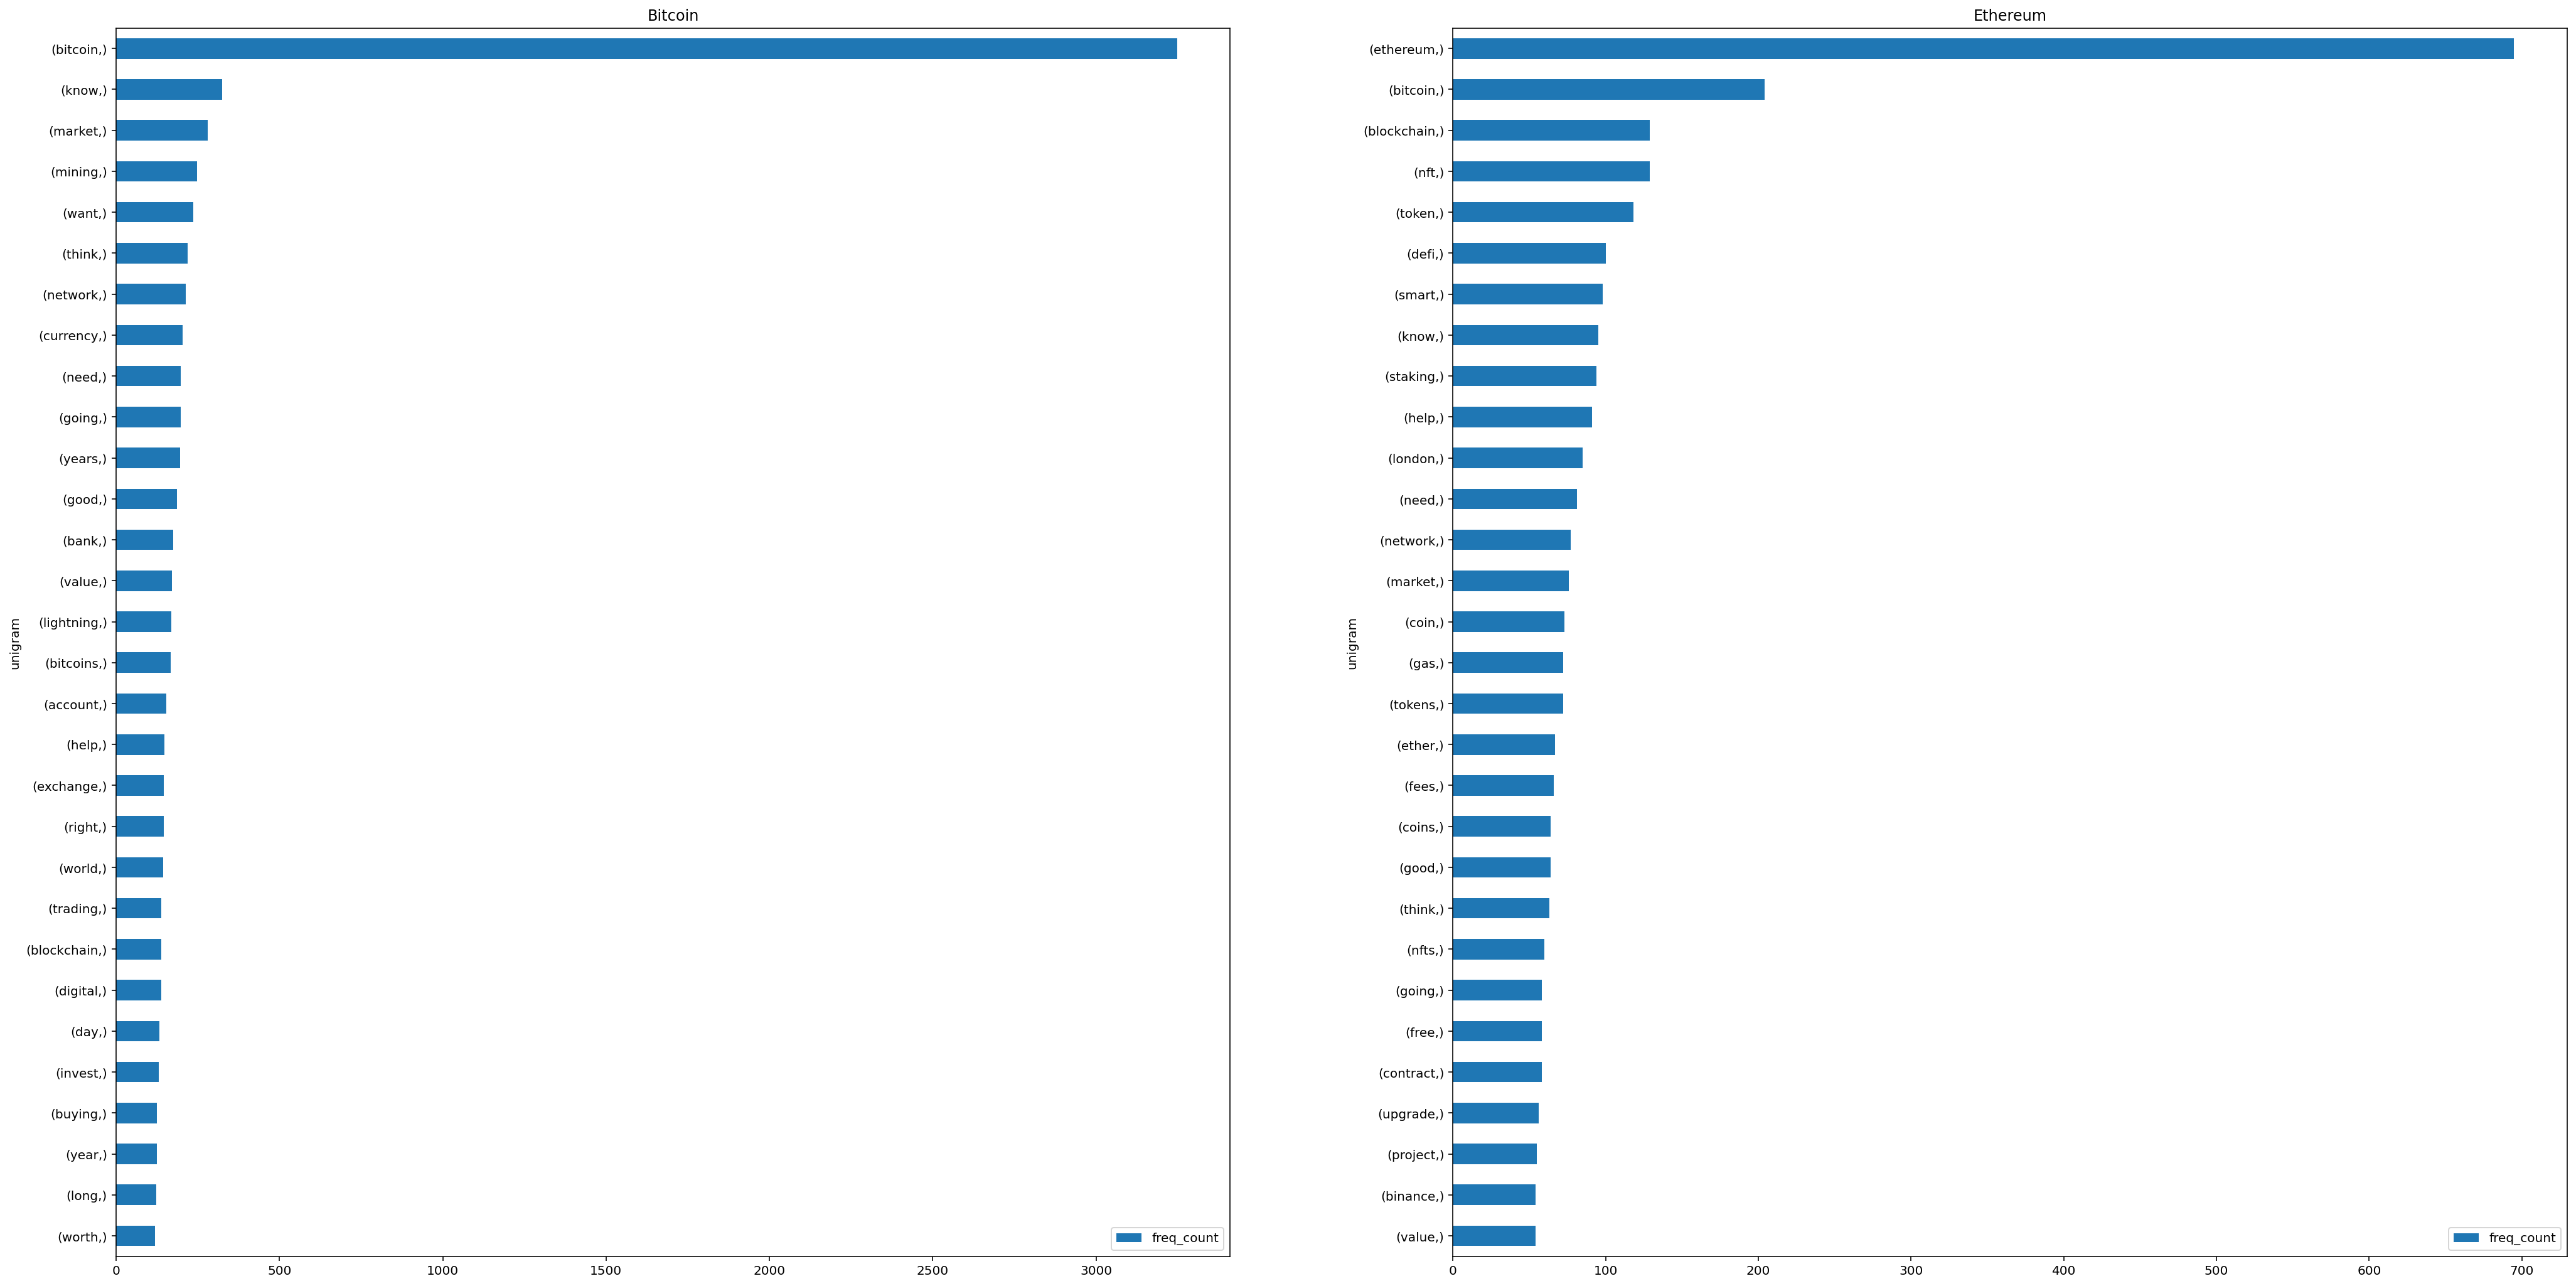

In [38]:
plot_ngrams( 1, 'unigram')

#### Bigrams

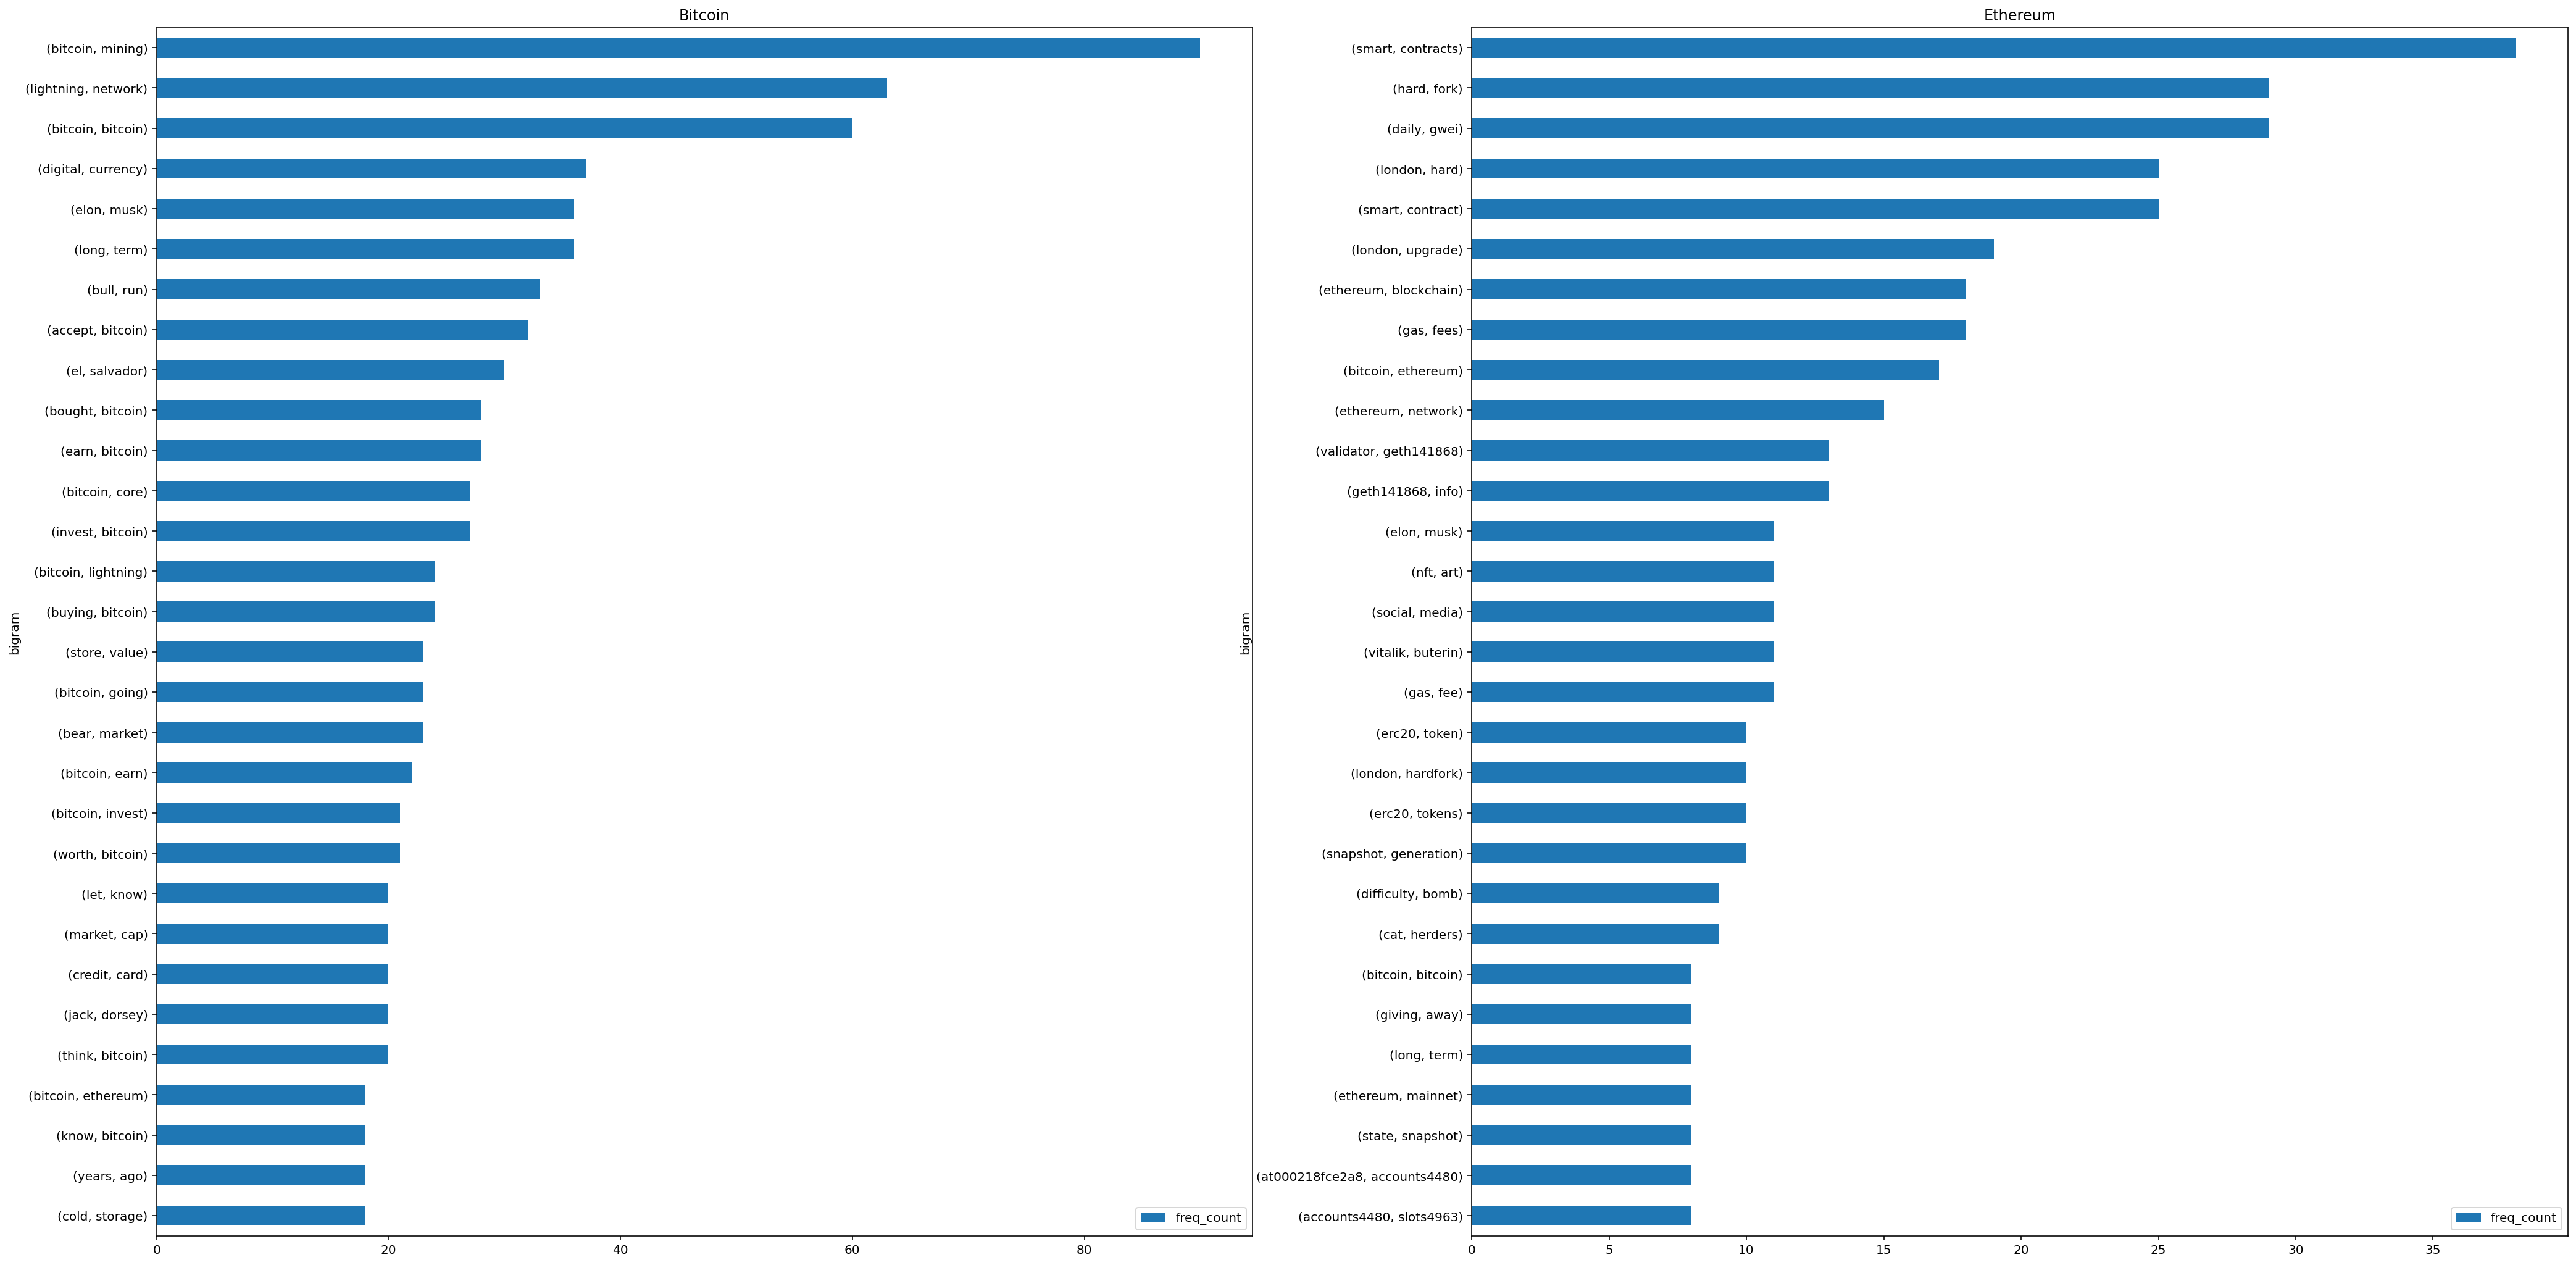

In [39]:
plot_ngrams(2, 'bigram')

#### Trigrams
* Here's the idea of growing wealth with Bitcoin is quite clear. Also evident is Elon Musk influence on Bitcoin
* With ethereum, it's its link with social media platforms that is evident here

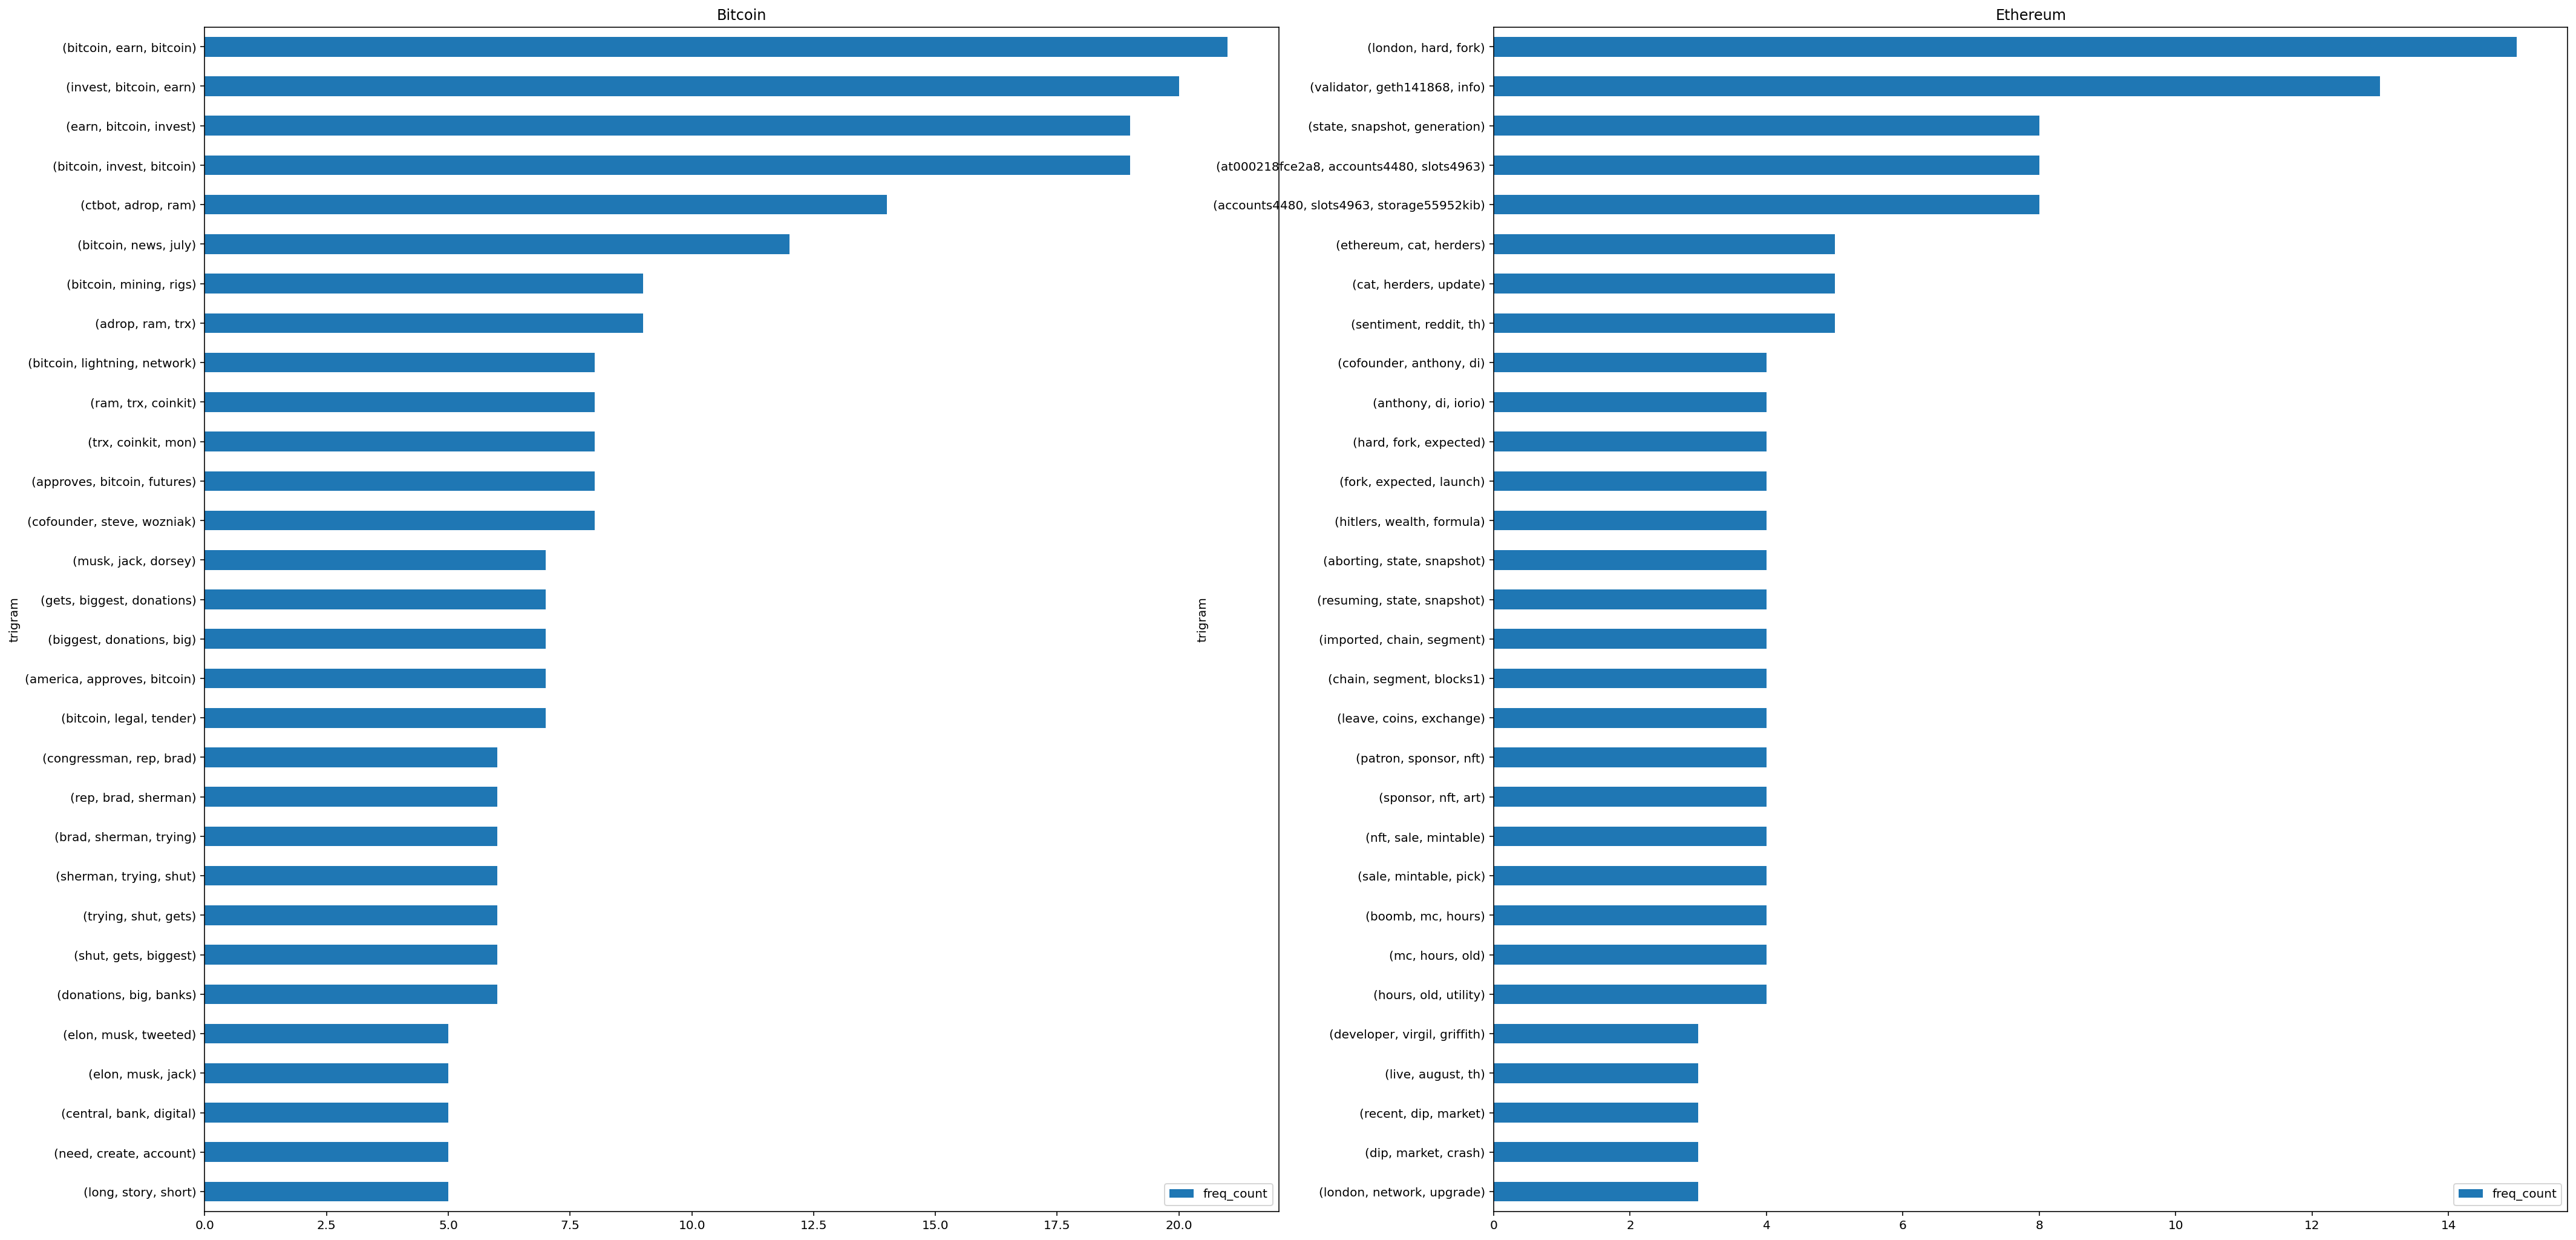

In [40]:
plot_ngrams(3, 'trigram')

#### Quadgrams
* At this point, combination are so rare there isnt much of a use anymore

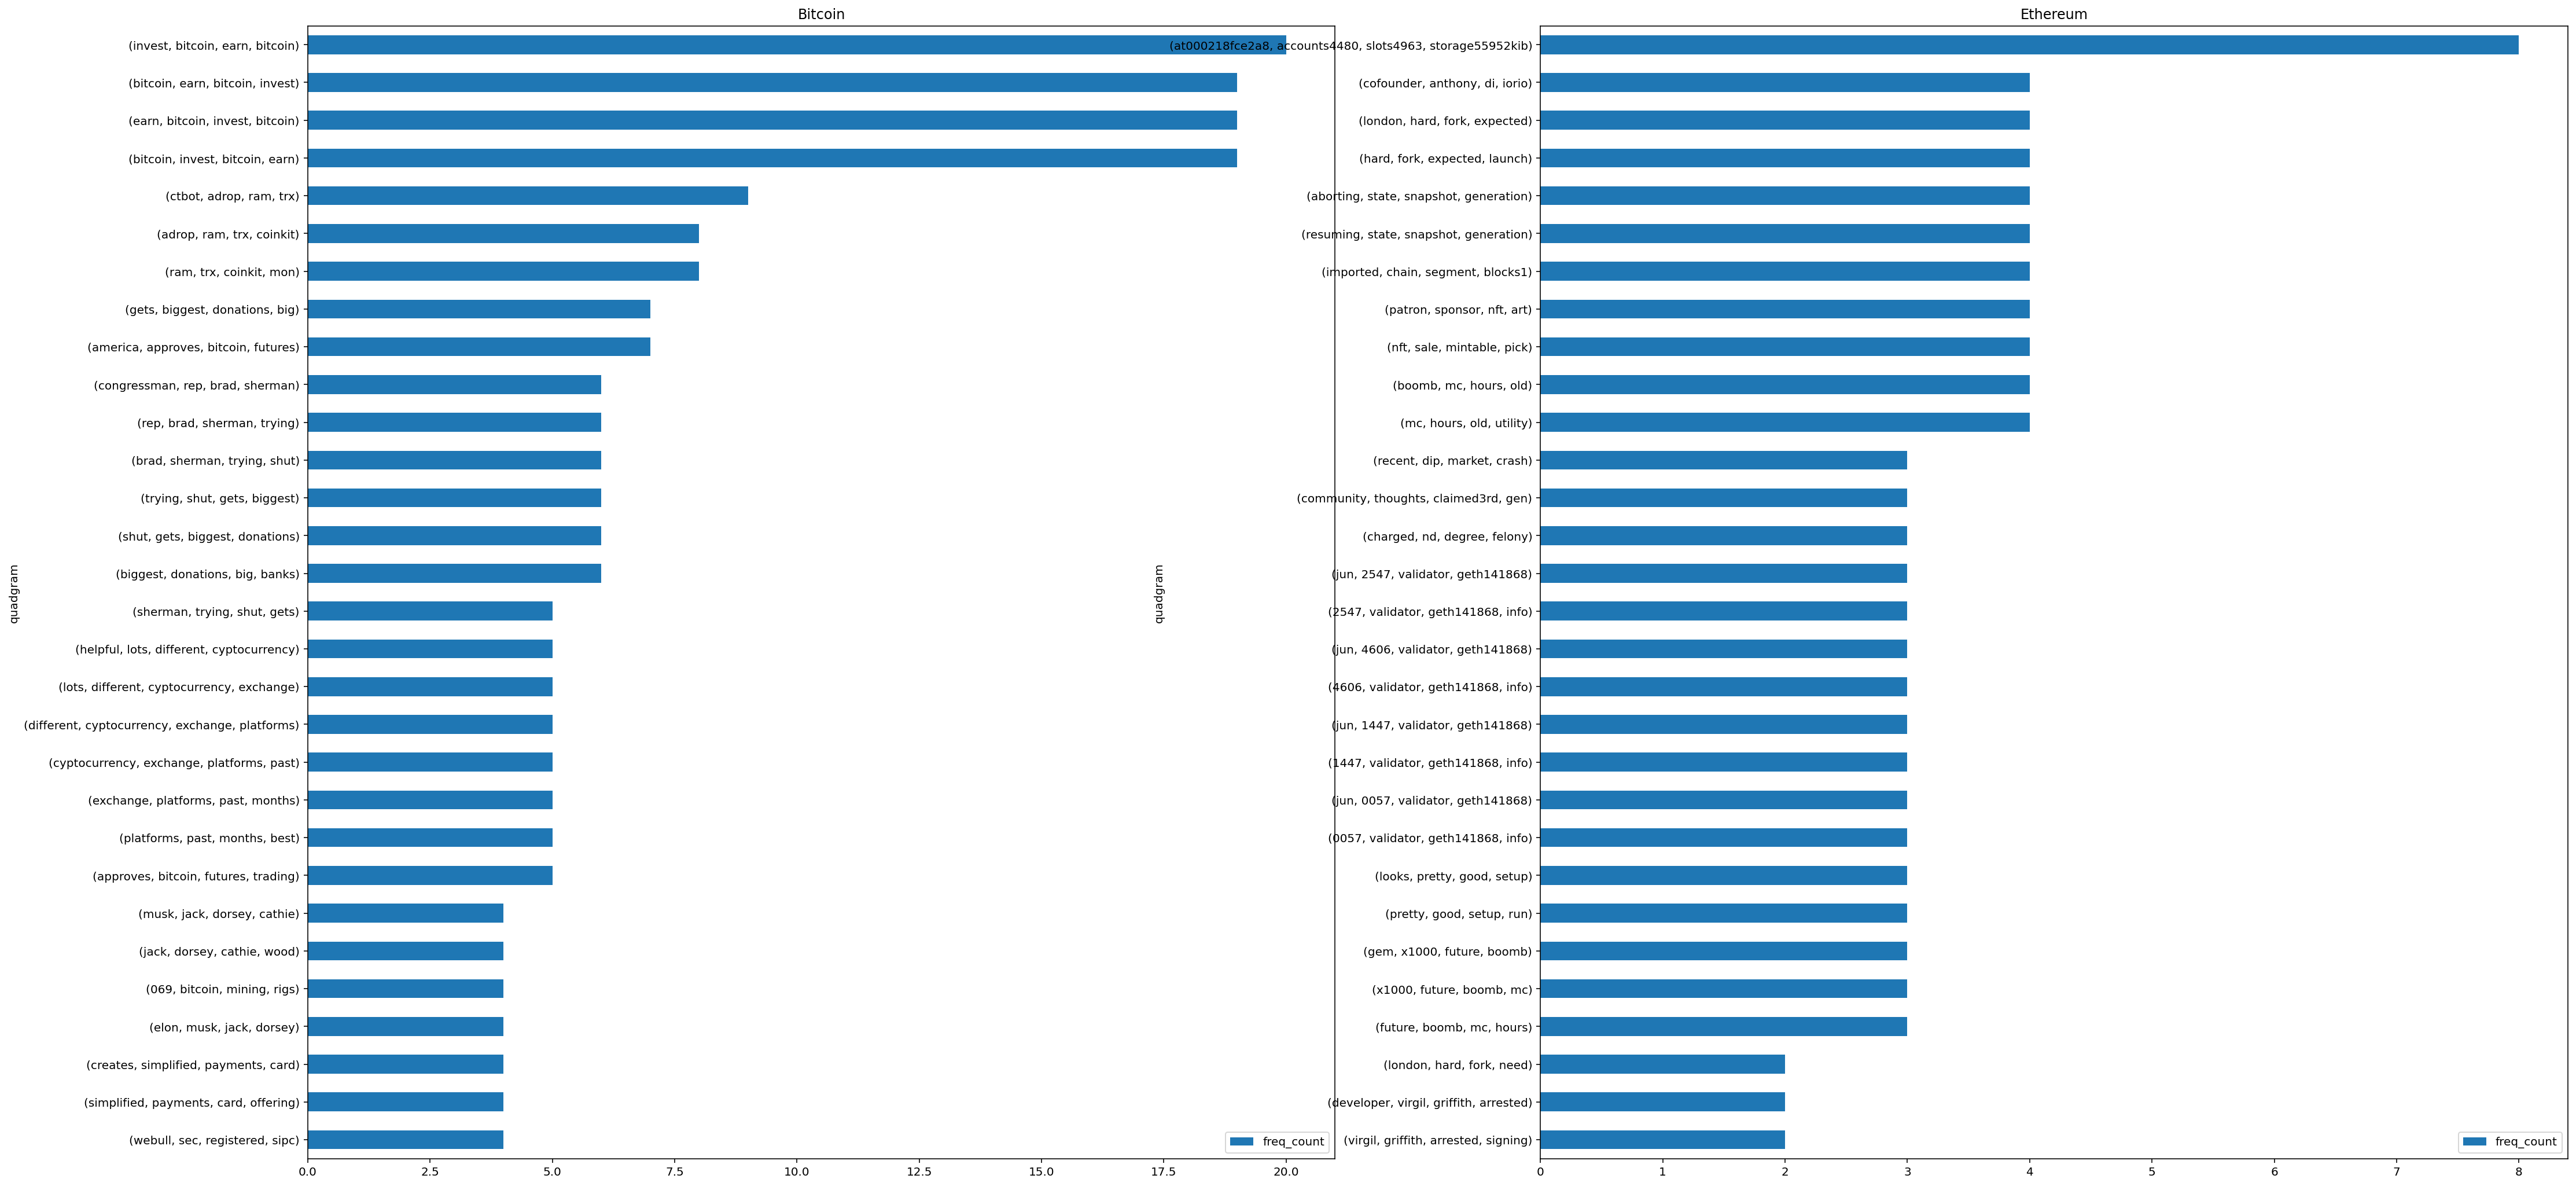

In [41]:
plot_ngrams(4, 'quadgram')

### Ngrams: TF-IDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

def plot_tfidf(n:int, name:str):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(35,12))
    vect = tfidf_vectorizer=TfidfVectorizer(ngram_range=(n, n))
    
    tfidf_matrix_btc = vect.fit_transform(btc_df['text_lemma'].values)
    plot_df_btc = pd.DataFrame(tfidf_matrix_btc.toarray(), columns=vect.get_feature_names()).sum().sort_values(ascending=False).head(30)
    plot_df_btc.plot(kind='barh',y='freq_count', x=name, title ="Bitcoin", edgecolor=None, ax = ax1)
    
    tfidf_matrix_eth = vect.fit_transform(eth_df['text_lemma'].values)
    plot_df_eth = pd.DataFrame(tfidf_matrix_eth.toarray(), columns=vect.get_feature_names()).sum().sort_values(ascending=False).head(30)
    plot_df_eth.plot(kind='barh',y='freq_count', x=name, title ="Ethereum", ax = ax2)
    
    ax1.invert_yaxis()
    ax2.invert_yaxis()
    plt.tight_layout


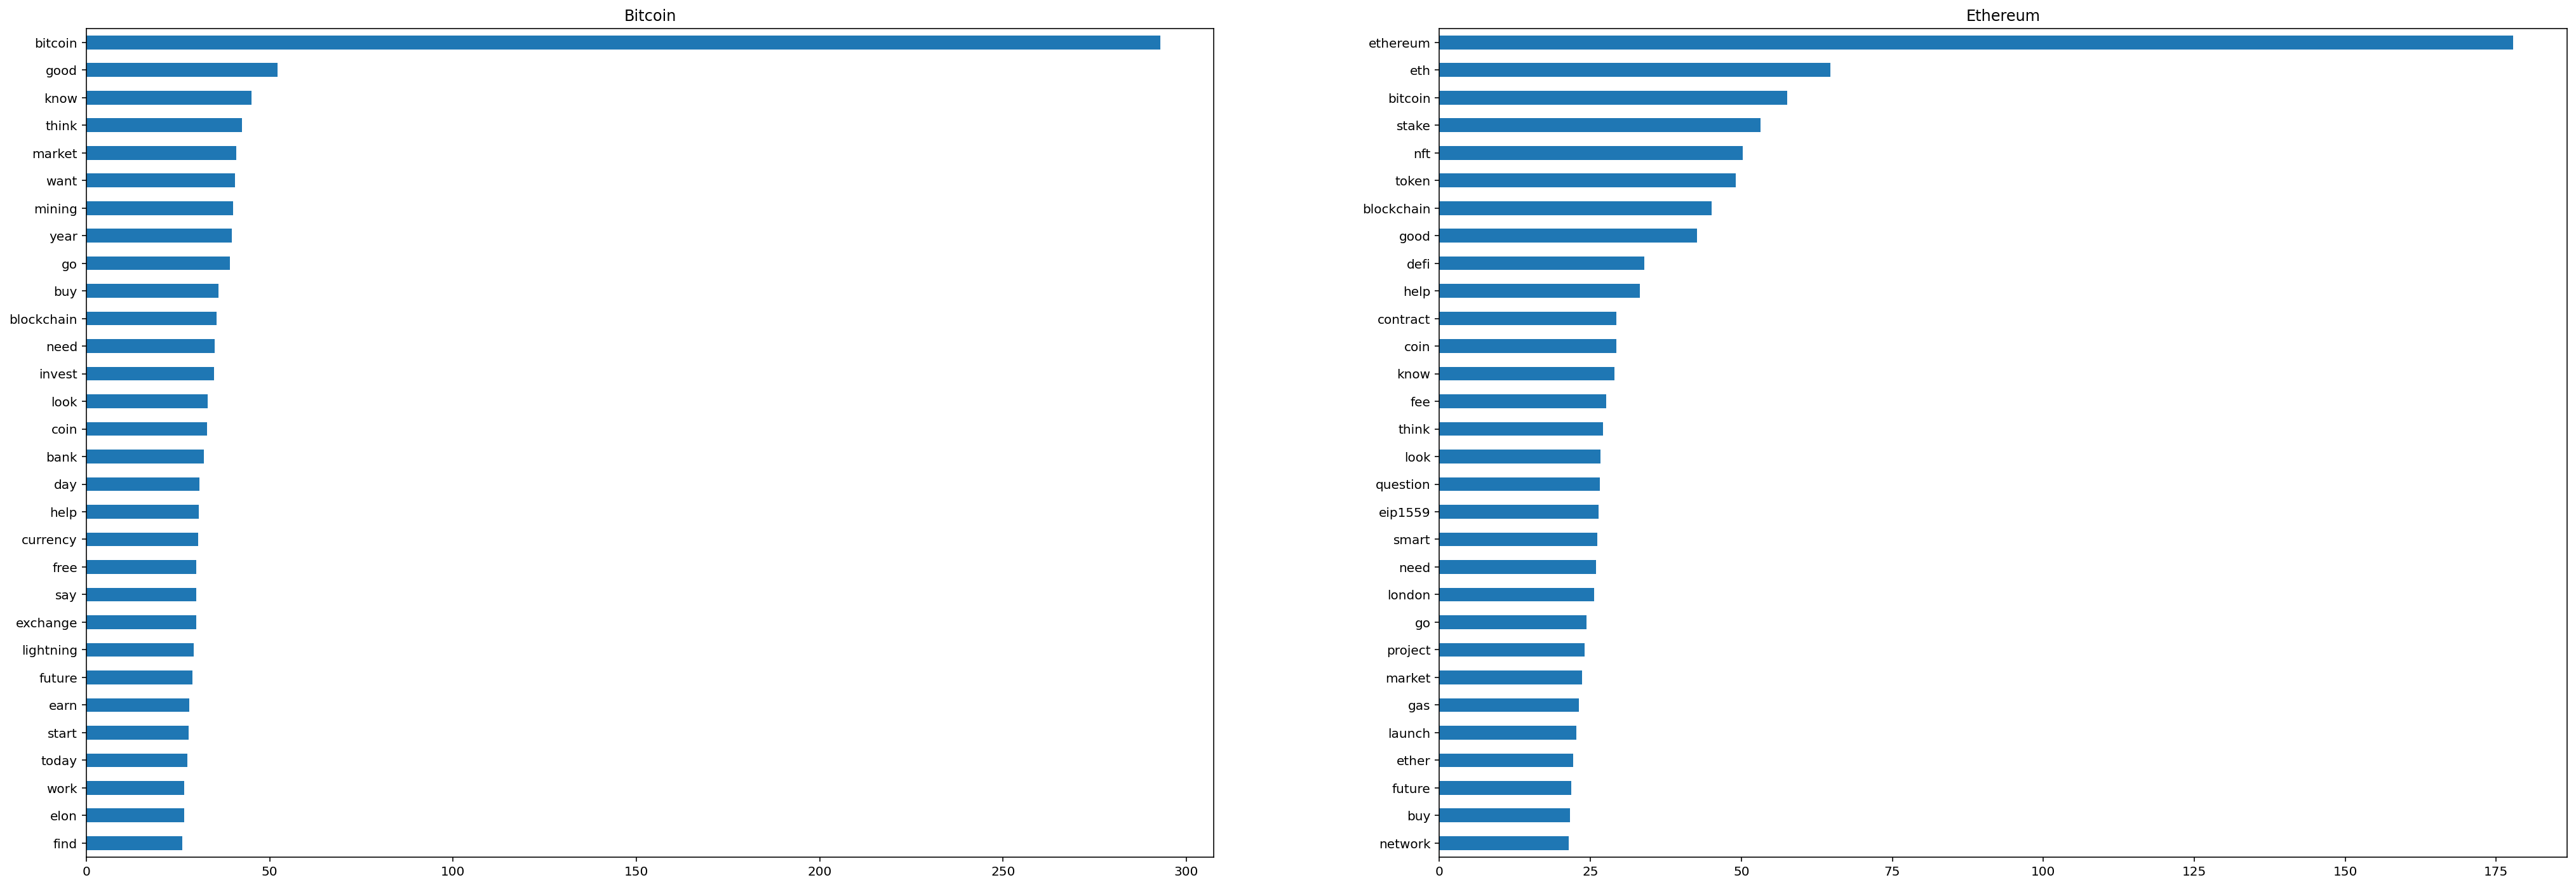

In [43]:
plot_tfidf(1, "Unigram")

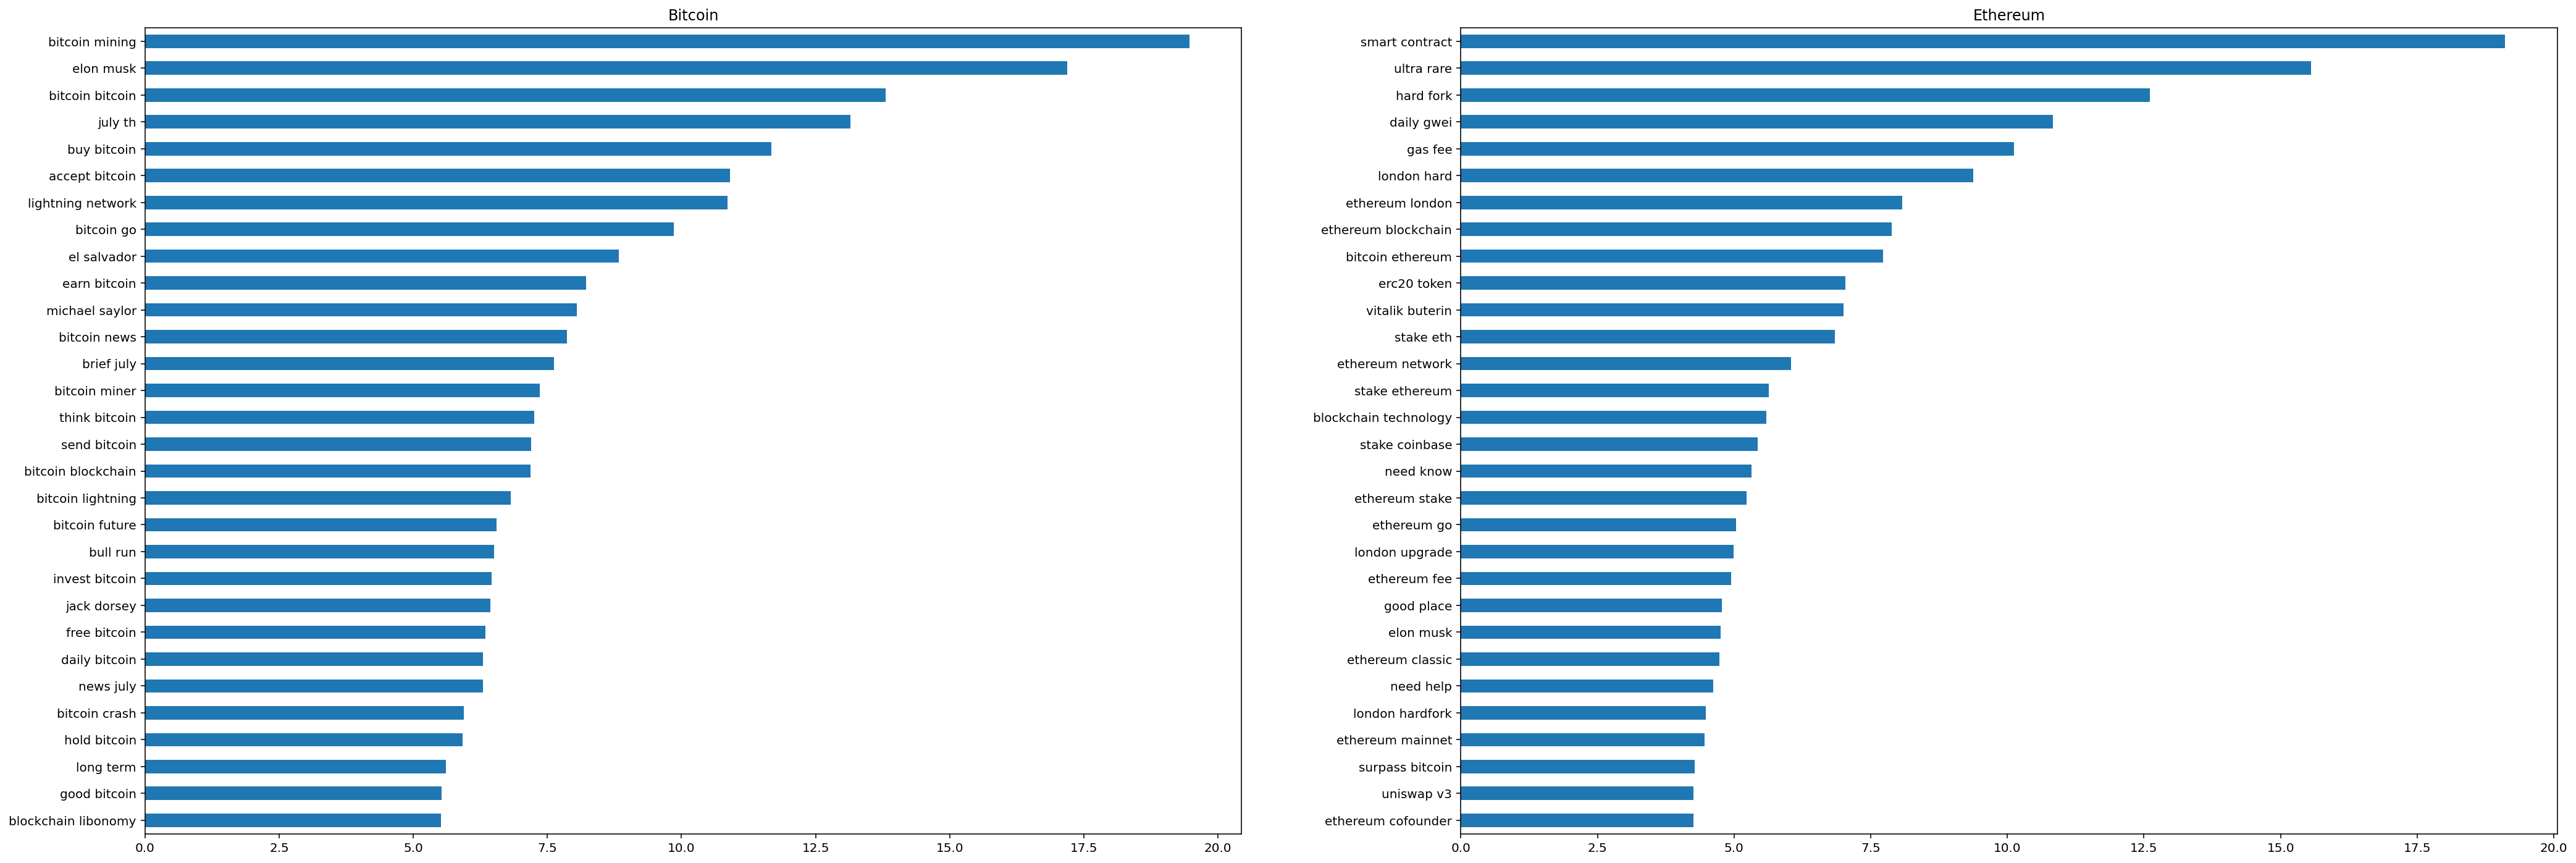

In [44]:
plot_tfidf(2, "Bigram")

### Clean up

In [45]:
df = df[df['text_lemma']!='']
df.head()

,author,text,word_count,date,text_no_sym,text_tok,text_no_stop,text_lemma,sent_count,char_count,is_ethereum
0,theremnanthodl,Bitcoin Town - A fiction novel about using Bitcoin against the Great Reset,11,2021-07-22 07:30:06,bitcoin town a fiction novel about using bitcoin against the great reset,"bitcoin, town, fiction, novel, about, using, bitcoin, against, the, great, reset","bitcoin, town, fiction, novel, bitcoin, great, reset","bitcoin, town, fiction, novel, bitcoin, great, reset",1,75,0
1,ReadDailyCoin,"Crypto Influencers Dorsey, Woods, and Musk Face-off During B-Word Conference",10,2021-07-22 07:12:50,crypto influencers dorsey woods and musk faceoff during bword conference,"crypto, influencers, dorsey, woods, and, musk, faceoff, during, bword, conference","influencers, dorsey, woods, musk, faceoff, bword, conference","influencer, dorsey, wood, musk, faceoff, bword, conference",1,77,0
2,theloiteringlinguist,Elon Musk’s View on Bitcoin (July 21 2021),6,2021-07-22 06:58:57,elon musks view on bitcoin july,"elon, musks, view, on, bitcoin, july","elon, musks, view, bitcoin, july","elon, musk, view, bitcoin, july",1,43,0
3,Electronic_Chard1987,"You’ve undoubtedly heard about crypto currencies by now such as Bitcoin, Ethereum and DOGE coin. But you can’t help but wonder what is it? What can I do with it? What is mining? Well CryptoMapz is here to give you answers to all those questions. We are your guide to navigate the crypto ecosystem.",55,2021-07-22 06:49:17,youve undoubtedly heard about crypto currencies by now such as bitcoin ethereum and doge coin but you cant help but wonder what is it what can i do with it what is mining well cryptomapz is here to give you answers to all those questions we are your guide to navigate the crypto ecosystem,"you, ve, undoubtedly, heard, about, crypto, currencies, by, now, such, as, bitcoin, ethereum, and, doge, coin, but, you, ca, nt, help, but, wonder, what, is, it, what, can, do, with, it, what, is, mining, well, cryptomapz, is, here, to, give, you, answers, to, all, those, questions, we, are, your, guide, to, navigate, the, crypto, ecosystem","undoubtedly, heard, currencies, bitcoin, ethereum, doge, coin, help, wonder, mining, cryptomapz, answers, questions, guide, navigate, ecosystem","undoubtedly, hear, currency, bitcoin, ethereum, doge, coin, help, wonder, mine, cryptomapz, answer, question, guide, navigate, ecosystem",6,298,0
4,FarEnergy3518,best crypto video ive ever watched,6,2021-07-22 06:49:14,best crypto video ive ever watched,"best, crypto, video, ve, ever, watched","best, video, watched","good, video, watch",1,35,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8167 entries, 0 to 8187
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        8167 non-null   object
 1   text          8167 non-null   object
 2   word_count    8167 non-null   int32 
 3   date          8167 non-null   object
 4   text_no_sym   8167 non-null   object
 5   text_tok      8167 non-null   object
 6   text_no_stop  8167 non-null   object
 7   text_lemma    8167 non-null   object
 8   sent_count    8167 non-null   int32 
 9   char_count    8167 non-null   int32 
 10  is_ethereum   8167 non-null   uint8 
dtypes: int32(3), object(7), uint8(1)
memory usage: 614.1+ KB


In [47]:
# write to file
# this will be useful as a starting point for experimentation
df.to_csv('data/transformed_data.csv', index=False)